In [1]:
import pandas as pd

In [2]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [3]:
web_features1 = []

tmp = []

for batch in range(0,100):
    with open('./unpaywall_feature_data_local_html/web_content_features_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)
        

print('content feature')
print(len(web_features1))



web_not_working = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Empty']
print(len(web_not_working))
web_not_english = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Non-EN']
print(len(web_not_english))
web_not = [ft for ind,ft in enumerate(web_features1) if len(ft) <=9]
print(len(web_not))
web_features = []
for ft in web_features1:
    if len(ft) <= 9:
        web_features.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0,0])
    else:
        web_features.append(ft)
    




print(len(web_features))

content feature
22038
45
887
933
22038


In [4]:
print(len(web_features))

22038


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

In [6]:
import numpy as np

In [7]:
abs_features1 = []


for batch in range(100):
    with open('./unpaywall_feature_data_local_html/web_content_features_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = []
        for t in tmp:
            if len(t) ==0:
                dt.append([[0] * 10])
            else:
                ttt = []
                for tt in t:
                    if len(tt) == 10:
                        ttt.append(tt)
                    else:
                        ttt.append([0] * 10)
                dt.append(ttt)
            
        #dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        #print(dat)
        abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]


print('abstract feature')
#print(abs_features1)
#print(abs_features0)
print(len(abs_features1))



abstract feature
22038


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tag_features1 = []


for batch in range(100):
    with open('./unpaywall_feature_data_local_html/web_html_tag_features_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)


print('tag feature')
tag_features = []

for ind,ft in enumerate(tag_features1):
    if len(ft) >1:
        tag_features.append(ft)
    else:
        tag_features.append('empty html tag')
    


print(len(tag_features))


tag feature
22038


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
import pickle

In [12]:
font_features1 = []

for batch in range(100):
    with open('./unpaywall_feature_data_local_html/web_font_features_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)


print('font feature')
print(len(font_features1))

font_features = []

for ind,ft in enumerate(font_features1):
    if len(ft) > 0:
        font_features.append(ft)
    else:
        font_features.append('not found')



print(len(font_features))



font feature
22038
22038


In [14]:
len(font_features)

22038

In [16]:
color_features1 = []


for batch in range(100):
    with open('./unpaywall_feature_data_local_html/web_color_features_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)


print('color feature')

color_features = []

for ind,ft in enumerate(color_features1):
    if len(ft) ==5:
        color_features.append(ft)
    else:
        color_features.append(['empty'])



color feature


In [17]:
bibilometrics = pd.read_csv('unpaywall_journals_biblio_features.csv')

In [18]:
bibilometrics.head(4)

,JournalId,NormalizedName,Issn,num_journal_publication,num_journal_author,num_journal_affiliation,journal_year_first_publish,journal_avg_hindex,journal_avg_first_author_hindex,journal_avg_last_author_hindex,...,journal_num_author_referenced,journal_num_author_cited,journal_num_affiliation_referenced,journal_num_affiliation_cited,journal_num_journal_self_reference,journal_num_author_self_reference,journal_num_affiliation_self_reference,journal_num_journal_self_cited,journal_num_author_self_cited,journal_num_affiliation_self_cited
0,161399637,cellular physiology and biochemistry,1015-8987,5954,24816,24816,1991,10.046757,5.605793,15.583137,...,536200,430505,5809,5929,2741,3253,2935,2694,3383,3170
1,47727624,international ophthalmology,0165-5701,4193,12322,12322,1978,7.421600,5.557528,8.626282,...,166566,84772,3947,3380,897,1445,1200,850,916,769
2,160779208,journal of applied probability,0021-9002,5390,5327,5327,1964,6.816621,6.514822,4.815399,...,27734,74518,1970,4431,3103,2469,748,2436,2367,709
3,22232893,nature reviews neurology,1759-4758,2931,3786,3786,2005,23.631601,20.509513,25.391675,...,297086,345246,5152,6364,525,1386,1233,486,990,912


In [19]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import roc_auc_score

In [20]:
unpaywall_journals = pd.read_csv('Unpaywall_journal_list_In_MAG_url_all_unique_normalizedname.csv')

In [21]:
unpaywall_journals.head(3)

,Issn,journal_name,Journal Title Normalized,URL
0,1015-8987,Cellular Physiology and Biochemistry,cellular physiology and biochemistry,https://www.karger.com/cpb
1,0165-5701,International Ophthalmology,international ophthalmology,https://www.springer.com/10792
2,0021-9002,Journal of Applied Probability,journal of applied probability,https://www.cambridge.org/core/journals/journa...


In [22]:
bib_features1 = []

counter = 0
for ind,row in unpaywall_journals.iterrows():
    if row['Journal Title Normalized'] in (bibilometrics['NormalizedName'].tolist()):
        tmp = bibilometrics.index[bibilometrics['NormalizedName']==row['Journal Title Normalized']]
        #print(tmp)
        val = bibilometrics.iloc[tmp].drop(columns=['JournalId','Issn','NormalizedName']).values.tolist()[0]
        print(val)
        print(len(val))
        bib_features1.append(val)
    else:
        bib_features1.append([0]*24)
    counter += 1

[5954.0, 24816.0, 24816.0, 1991.0, 10.04675673256743, 5.605793450881612, 15.583137386630836, 6.99332496797758, 203586.0, 130983.0, 4696.0, 5822.0, 5085.0, 5118.0, 536200.0, 430505.0, 5809.0, 5929.0, 2741.0, 3253.0, 2935.0, 2694.0, 3383.0, 3170.0]
24
[4193.0, 12322.0, 12322.0, 1978.0, 7.421600215001431, 5.557527733755943, 8.626281898402098, 5.254642961788916, 90757.0, 37025.0, 4104.0, 3375.0, 3713.0, 2853.0, 166566.0, 84772.0, 3947.0, 3380.0, 897.0, 1445.0, 1200.0, 850.0, 916.0, 769.0]
24
[5390.0, 5327.0, 5327.0, 1964.0, 6.816620611084853, 6.514821865651347, 4.815398886827459, 8.120551724137933, 62899.0, 113631.0, 5283.0, 4917.0, 1524.0, 3604.0, 27734.0, 74518.0, 1970.0, 4431.0, 3103.0, 2469.0, 748.0, 2436.0, 2367.0, 709.0]
24
[2931.0, 3786.0, 3786.0, 2005.0, 23.631600689268208, 20.50951293759513, 25.391675196178777, 28.74794774556407, 106349.0, 114934.0, 2803.0, 2150.0, 3921.0, 5897.0, 297086.0, 345246.0, 5152.0, 6364.0, 525.0, 1386.0, 1233.0, 486.0, 990.0, 912.0]
24
[1283.0, 9668.0, 9

[2946.0, 4522.0, 4522.0, 1800.0, 10.047421810940875, 7.306360708534622, 10.5050916496945, 10.7092448804699, 92493.0, 131169.0, 2794.0, 2728.0, 2612.0, 6033.0, 51277.0, 120198.0, 2844.0, 5520.0, 1789.0, 2031.0, 1908.0, 1504.0, 1960.0, 1879.0]
24
[1984.0, 791.0, 791.0, 1947.0, 5.500536480686695, 5.550108932461874, 2.519657258064516, 0.9444444444444444, 11685.0, 11664.0, 855.0, 1001.0, 667.0, 1300.0, 6016.0, 9263.0, 680.0, 1393.0, 181.0, 298.0, 198.0, 208.0, 286.0, 214.0]
24
[554.0, 1328.0, 1328.0, 1992.0, 14.441034837511316, 10.042145593869732, 18.435018050541515, 14.216942148760326, 26015.0, 38390.0, 532.0, 496.0, 922.0, 1220.0, 25610.0, 42252.0, 1891.0, 2903.0, 252.0, 487.0, 472.0, 203.0, 396.0, 379.0]
24
[995.0, 2535.0, 2535.0, 1995.0, 11.753355527527043, 8.172413793103448, 14.17386934673367, 10.565329948576831, 21487.0, 20091.0, 703.0, 860.0, 1875.0, 2366.0, 43935.0, 44494.0, 2470.0, 2931.0, 351.0, 512.0, 343.0, 363.0, 561.0, 389.0]
24
[1711.0, 2069.0, 2069.0, 1973.0, 7.9370970087399

[227.0, 347.0, 347.0, 2004.0, 4.943424973295103, 3.768115942028986, 3.33920704845815, 5.726996527777778, 5025.0, 1659.0, 221.0, 207.0, 795.0, 206.0, 6347.0, 1767.0, 904.0, 402.0, 156.0, 95.0, 25.0, 168.0, 82.0, 14.0]
24
[600.0, 175.0, 175.0, 1983.0, 2.578938802083333, 2.404, 1.1616666666666666, 5.68154761904762, 2322.0, 836.0, 198.0, 183.0, 428.0, 223.0, 2839.0, 932.0, 382.0, 256.0, 37.0, 47.0, 15.0, 39.0, 42.0, 12.0]
24
[3196.0, 3490.0, 3490.0, 1988.0, 16.17744888402949, 14.21719659650694, 13.584793491864833, 13.329710495236428, 83906.0, 65347.0, 2198.0, 2535.0, 3989.0, 5400.0, 186430.0, 166984.0, 5075.0, 5539.0, 450.0, 1321.0, 890.0, 563.0, 1080.0, 720.0]
24
[150.0, 65.0, 65.0, 1992.0, 9.632562530062527, 6.345679012345679, 7.1466666666666665, 4.786925647451963, 521.0, 2543.0, 19.0, 140.0, 171.0, 779.0, 1713.0, 9004.0, 221.0, 948.0, 12.0, 14.0, 9.0, 12.0, 58.0, 53.0]
24
[4536.0, 5687.0, 5687.0, 1969.0, 5.225365862369172, 4.747368421052632, 3.075837742504409, 4.893134974478259, 97303.0

[386.0, 323.0, 323.0, 1987.0, 3.5782997762863533, 3.333333333333333, 1.1269430051813472, 2.136363636363636, 4093.0, 1170.0, 284.0, 225.0, 549.0, 300.0, 3908.0, 1370.0, 399.0, 390.0, 31.0, 45.0, 1.0, 43.0, 43.0, 2.0]
24
[292.0, 697.0, 697.0, 1997.0, 8.309535634950572, 5.113333333333333, 7.763698630136986, 5.243265887318752, 4857.0, 216.0, 223.0, 106.0, 906.0, 114.0, 26676.0, 1142.0, 1574.0, 262.0, 19.0, 55.0, 51.0, 22.0, 27.0, 28.0]
24
[4103.0, 8218.0, 8218.0, 1970.0, 8.317407556415214, 5.180503144654088, 10.02924689251767, 7.752812057620323, 89325.0, 129348.0, 3772.0, 3944.0, 3869.0, 5519.0, 146037.0, 199346.0, 3747.0, 4924.0, 2195.0, 2666.0, 2514.0, 1949.0, 2653.0, 2469.0]
24
[550.0, 537.0, 537.0, 1991.0, 7.296697082260462, 6.471830985915493, 6.665454545454545, 6.769684113865932, 8426.0, 3996.0, 289.0, 448.0, 611.0, 526.0, 11904.0, 7943.0, 1139.0, 1219.0, 164.0, 216.0, 93.0, 161.0, 284.0, 137.0]
24
[3132.0, 6749.0, 6749.0, 1973.0, 14.897440355407504, 9.215566714490674, 18.940613026819

[707.0, 1863.0, 1863.0, 1983.0, 13.231604992125346, 10.986754966887418, 14.35926449787836, 11.716362447298204, 106852.0, 70191.0, 639.0, 684.0, 3427.0, 3598.0, 199209.0, 172340.0, 4325.0, 5101.0, 240.0, 545.0, 497.0, 273.0, 512.0, 475.0]
24
[408.0, 852.0, 852.0, 2010.0, 7.191145671394288, 5.350819672131148, 6.987745098039215, 6.465239279791518, 7459.0, 2670.0, 359.0, 302.0, 1505.0, 539.0, 14523.0, 4979.0, 1976.0, 1041.0, 87.0, 187.0, 70.0, 99.0, 136.0, 72.0]
24
[1193.0, 2122.0, 2122.0, 1975.0, 23.98009086151033, 20.743718592964825, 27.6035205364627, 14.737288840788842, 92289.0, 218552.0, 915.0, 1141.0, 3471.0, 7653.0, 266665.0, 568612.0, 4035.0, 7556.0, 257.0, 681.0, 628.0, 307.0, 737.0, 680.0]
24
[297.0, 224.0, 224.0, 1995.0, 5.65145754119138, 5.773809523809524, 4.508417508417509, 5.055555555555555, 3961.0, 8154.0, 154.0, 198.0, 529.0, 1222.0, 3930.0, 9359.0, 523.0, 1427.0, 57.0, 91.0, 76.0, 60.0, 128.0, 128.0]
24
[984.0, 1428.0, 1428.0, 1976.0, 4.056454081632652, 4.395104895104895, 1

[24155.0, 70684.0, 70684.0, 1955.0, 12.12137483537876, 8.391096895973154, 16.03245704823018, 9.635261316389135, 543396.0, 750676.0, 21012.0, 21912.0, 5167.0, 9120.0, 686047.0, 1031926.0, 5621.0, 8181.0, 14823.0, 14642.0, 12662.0, 12512.0, 13424.0, 11723.0]
24
[805.0, 637.0, 637.0, 1998.0, 8.029496402877697, 8.04913294797688, 6.737888198757764, 8.764705882352942, 20839.0, 21363.0, 720.0, 666.0, 1693.0, 2769.0, 14579.0, 22843.0, 1166.0, 2200.0, 250.0, 387.0, 225.0, 268.0, 299.0, 254.0]
24
[718.0, 1272.0, 1272.0, 1992.0, 6.792530605359553, 5.198458574181117, 5.8774373259052926, 5.9744994994995, 19243.0, 4565.0, 668.0, 556.0, 2318.0, 1071.0, 29288.0, 9250.0, 2803.0, 1707.0, 167.0, 373.0, 278.0, 242.0, 273.0, 198.0]
24
[2337.0, 9475.0, 9475.0, 1988.0, 11.89110738027018, 8.872800402212167, 17.454000855798032, 9.113914400683903, 71030.0, 43995.0, 2225.0, 2053.0, 3447.0, 4273.0, 149881.0, 126847.0, 3763.0, 4387.0, 1002.0, 1570.0, 1485.0, 884.0, 1171.0, 1111.0]
24
[2504.0, 9631.0, 9631.0, 1996.

[3352.0, 2047.0, 2047.0, 1945.0, 4.093275361865107, 3.3308619091751623, 1.7556682577565632, 2.534320980111052, 14940.0, 14001.0, 677.0, 1879.0, 1601.0, 1454.0, 31115.0, 32322.0, 1931.0, 2050.0, 325.0, 392.0, 211.0, 427.0, 549.0, 226.0]
24
[1108.0, 3114.0, 3114.0, 1999.0, 12.69135305256691, 10.694300518134716, 14.274368231046932, 10.363090578508343, 41495.0, 21705.0, 966.0, 901.0, 3551.0, 2244.0, 71435.0, 53625.0, 3808.0, 3605.0, 538.0, 737.0, 720.0, 540.0, 580.0, 602.0]
24
[5538.0, 9236.0, 9236.0, 1993.0, 11.5805059407399, 9.45881126173097, 12.96117732033225, 5.44462727356411, 116061.0, 108974.0, 2453.0, 4954.0, 4495.0, 6240.0, 383298.0, 373716.0, 5488.0, 6594.0, 405.0, 1731.0, 1647.0, 458.0, 2774.0, 2715.0]
24
[322.0, 575.0, 575.0, 1991.0, 12.28765547263681, 10.739669421487603, 11.385093167701864, 9.114401294498382, 13301.0, 3009.0, 298.0, 237.0, 937.0, 507.0, 12085.0, 4124.0, 1229.0, 894.0, 53.0, 216.0, 145.0, 49.0, 137.0, 99.0]
24
[473.0, 649.0, 649.0, 2000.0, 11.440503875968997, 10

[2277.0, 67.0, 67.0, 1960.0, 4.457025055502696, 4.484119345524543, 2.01624945103206, 2.75, 673.0, 8147.0, 62.0, 1318.0, 137.0, 1132.0, 625.0, 5819.0, 182.0, 1044.0, 24.0, 9.0, 8.0, 44.0, 167.0, 86.0]
24
[1328.0, 592.0, 592.0, 1991.0, 3.229712301587302, 3.262458471760797, 0.6942771084337349, 1.6176470588235294, 3102.0, 3446.0, 549.0, 728.0, 302.0, 372.0, 2877.0, 3100.0, 515.0, 668.0, 264.0, 97.0, 16.0, 313.0, 148.0, 12.0]
24
[1137.0, 1372.0, 1372.0, 1984.0, 7.505258827896909, 6.651982378854625, 5.839929639401935, 1.9367017471310093, 17197.0, 1605.0, 567.0, 363.0, 862.0, 308.0, 33444.0, 4602.0, 1576.0, 618.0, 129.0, 368.0, 304.0, 131.0, 202.0, 164.0]
24
[386.0, 604.0, 604.0, 2005.0, 9.901033243486076, 9.374285714285714, 9.704663212435234, 9.948581560283689, 11419.0, 4462.0, 378.0, 336.0, 684.0, 716.0, 8645.0, 5346.0, 1175.0, 1291.0, 159.0, 243.0, 226.0, 157.0, 191.0, 165.0]
24
[954.0, 3345.0, 3345.0, 1993.0, 12.39069498581743, 7.549731182795699, 16.71069182389937, 8.619914371641753, 2645

[1788.0, 1144.0, 1144.0, 1992.0, 7.00065105956215, 4.807892004153686, 5.2712527964205815, 4.125760405203709, 5986.0, 11277.0, 474.0, 1307.0, 727.0, 1326.0, 9221.0, 20356.0, 994.0, 2061.0, 253.0, 306.0, 56.0, 358.0, 523.0, 96.0]
24
[9.0, 5.0, 5.0, 2001.0, 3.395833333333333, 3.142857142857143, 2.555555555555556, 4.333333333333333, 20.0, 77.0, 3.0, 8.0, 7.0, 25.0, 35.0, 127.0, 10.0, 51.0, 1.0, 1.0, 1.0, 1.0, 6.0, 1.0]
24
[935.0, 87.0, 87.0, 1995.0, 2.854014598540146, 2.857142857142857, 0.8085561497326204, 0.6, 295.0, 593.0, 94.0, 207.0, 120.0, 145.0, 353.0, 510.0, 65.0, 171.0, 4.0, 4.0, 1.0, 6.0, 19.0, 2.0]
24
[4792.0, 11557.0, 11557.0, 1990.0, 9.487884427930734, 7.196030534351145, 10.33660267111853, 5.77266236651532, 68041.0, 64106.0, 2906.0, 3924.0, 3060.0, 5154.0, 148617.0, 155404.0, 3462.0, 4484.0, 1247.0, 1545.0, 1104.0, 1233.0, 1730.0, 1275.0]
24
[1365.0, 1762.0, 1762.0, 1982.0, 8.831303528605686, 8.510416666666666, 7.221245421245421, 9.31658496732026, 50704.0, 57042.0, 1155.0, 1107

[3687.0, 6299.0, 6299.0, 1985.0, 9.92436625960922, 7.905751391465677, 9.57634933550312, 7.733042891688054, 46796.0, 51253.0, 2323.0, 2447.0, 3606.0, 4896.0, 102475.0, 113060.0, 3509.0, 4695.0, 1108.0, 1326.0, 1094.0, 1104.0, 1233.0, 1057.0]
24
[9407.0, 10746.0, 10746.0, 1964.0, 6.594874990151996, 5.124771859963498, 6.871478686084831, 3.734985473353887, 52452.0, 157482.0, 2849.0, 8375.0, 2738.0, 6124.0, 146799.0, 333399.0, 3353.0, 5526.0, 1160.0, 1287.0, 773.0, 1574.0, 2743.0, 1288.0]
24
[4156.0, 6773.0, 6773.0, 1958.0, 4.753194681336312, 4.032613908872902, 2.603224254090472, 4.217994096595088, 64674.0, 58560.0, 4023.0, 3913.0, 2362.0, 2520.0, 77506.0, 84037.0, 2167.0, 3177.0, 2791.0, 1385.0, 1227.0, 2560.0, 1273.0, 1230.0]
24
[32500.0, 65588.0, 65588.0, 1945.0, 7.5979511993421935, 5.454004549962083, 6.164707692307692, 4.997078273792456, 905850.0, 724745.0, 28219.0, 29173.0, 7799.0, 11904.0, 1471031.0, 1579853.0, 8069.0, 10586.0, 8585.0, 11882.0, 13666.0, 8437.0, 11012.0, 13522.0]
24
[1

[1471.0, 1770.0, 1770.0, 1998.0, 9.592890985065356, 8.930415263748596, 6.744391570360299, 6.716936227352894, 7713.0, 10605.0, 824.0, 788.0, 1268.0, 1245.0, 26985.0, 24566.0, 2108.0, 2466.0, 228.0, 444.0, 331.0, 244.0, 280.0, 223.0]
24
[2147.0, 1218.0, 1218.0, 1985.0, 5.1898749022673965, 5.022765598650928, 2.951560316721006, 5.286666666666667, 19962.0, 11764.0, 842.0, 1034.0, 1211.0, 1649.0, 14933.0, 14108.0, 1390.0, 1910.0, 192.0, 354.0, 239.0, 202.0, 356.0, 247.0]
24
[1030.0, 1450.0, 1450.0, 1997.0, 6.077843740902054, 4.586956521739131, 5.323300970873786, 2.895906757941565, 10963.0, 10864.0, 373.0, 841.0, 1715.0, 2422.0, 47742.0, 51269.0, 2040.0, 2981.0, 95.0, 170.0, 92.0, 110.0, 281.0, 158.0]
24
[753.0, 1602.0, 1602.0, 1991.0, 11.089377661633758, 7.841040462427745, 12.371845949535192, 12.081442080378247, 23259.0, 27156.0, 732.0, 699.0, 1203.0, 1656.0, 21090.0, 33559.0, 2117.0, 3183.0, 280.0, 592.0, 540.0, 256.0, 485.0, 448.0]
24
[202.0, 670.0, 670.0, 2013.0, 11.377395056906336, 5.586

[3467.0, 3914.0, 3914.0, 1949.0, 6.564457027231534, 4.761165048543689, 3.633112200749928, 5.026812715607568, 30842.0, 44627.0, 1821.0, 2760.0, 1122.0, 1341.0, 31967.0, 49655.0, 2122.0, 2734.0, 1126.0, 961.0, 313.0, 1371.0, 1111.0, 266.0]
24
[4296.0, 3603.0, 3603.0, 1927.0, 9.941017362779723, 8.400070997515087, 10.256284916201118, 5.97543718020806, 28130.0, 34077.0, 1285.0, 3028.0, 2408.0, 3412.0, 64895.0, 77650.0, 2778.0, 3596.0, 530.0, 977.0, 862.0, 639.0, 1582.0, 1269.0]
24
[4251.0, 11442.0, 11442.0, 1981.0, 12.498961003364984, 9.026097271648872, 16.474241354975298, 8.748825836954568, 75245.0, 92206.0, 2509.0, 3901.0, 3042.0, 5493.0, 183871.0, 240472.0, 3783.0, 5185.0, 866.0, 1677.0, 1317.0, 922.0, 1966.0, 1510.0]
24
[266.0, 625.0, 625.0, 2009.0, 6.467370600414078, 5.202020202020202, 5.650375939849624, 5.305729166666667, 8458.0, 1170.0, 256.0, 207.0, 1704.0, 268.0, 15608.0, 1932.0, 2142.0, 643.0, 116.0, 121.0, 112.0, 131.0, 71.0, 58.0]
24
[940.0, 1004.0, 1004.0, 2002.0, 7.88841361131

[878.0, 161.0, 161.0, 1979.0, 3.615819209039548, 3.5517241379310347, 0.7050113895216401, 10.333333333333334, 1443.0, 620.0, 163.0, 147.0, 232.0, 192.0, 1513.0, 637.0, 182.0, 231.0, 17.0, 15.0, 13.0, 18.0, 14.0, 10.0]
24
[752.0, 788.0, 788.0, 1998.0, 6.759192194486312, 6.2961730449251245, 5.767287234042553, 6.855487722154389, 18448.0, 16844.0, 643.0, 614.0, 2258.0, 2039.0, 19590.0, 18870.0, 1834.0, 2395.0, 336.0, 333.0, 278.0, 310.0, 291.0, 264.0]
24
[1338.0, 684.0, 684.0, 1989.0, 6.130720354108659, 6.171052631578948, 2.7466367713004485, 4.398170731707317, 2058.0, 2771.0, 697.0, 695.0, 425.0, 558.0, 2583.0, 3253.0, 380.0, 604.0, 39.0, 162.0, 6.0, 39.0, 112.0, 2.0]
24
[1312.0, 805.0, 805.0, 1965.0, 8.735863772260501, 7.585342333654773, 7.727134146341464, 10.294933333333336, 15856.0, 41925.0, 541.0, 1196.0, 1073.0, 4775.0, 12667.0, 64941.0, 1457.0, 4312.0, 317.0, 438.0, 403.0, 355.0, 735.0, 618.0]
24
[673.0, 905.0, 905.0, 1983.0, 6.658377686343789, 6.174509803921569, 5.671619613670134, 5.

[1032.0, 951.0, 951.0, 1994.0, 5.824131274131272, 5.781914893617022, 4.3187984496124034, 5.030465949820789, 20565.0, 13581.0, 893.0, 781.0, 2164.0, 1448.0, 15807.0, 10227.0, 1359.0, 1525.0, 533.0, 416.0, 290.0, 467.0, 321.0, 256.0]
24
[4130.0, 9899.0, 9899.0, 1947.0, 8.923735079534108, 6.026765113059529, 8.121791767554479, 6.240654207777649, 84771.0, 54949.0, 2764.0, 2833.0, 4954.0, 5018.0, 190995.0, 152123.0, 5394.0, 5585.0, 701.0, 1647.0, 1593.0, 694.0, 1398.0, 1304.0]
24
[1472.0, 430.0, 430.0, 1986.0, 2.0199771689497714, 2.038732394366197, 0.3865489130434782, 0.4738292011019283, 4314.0, 847.0, 460.0, 351.0, 458.0, 162.0, 4466.0, 824.0, 274.0, 161.0, 25.0, 48.0, 17.0, 23.0, 21.0, 8.0]
24
[1314.0, 3083.0, 3083.0, 1996.0, 12.4954717993844, 8.892384105960264, 16.38812785388128, 10.998798441427144, 44909.0, 36653.0, 1286.0, 1237.0, 2997.0, 3911.0, 56308.0, 68006.0, 3130.0, 4244.0, 775.0, 934.0, 945.0, 693.0, 777.0, 779.0]
24
[4121.0, 13423.0, 13423.0, 1990.0, 22.07206720894961, 11.921678

[876.0, 1626.0, 1626.0, 1993.0, 7.778258623430293, 5.899641577060932, 6.92351598173516, 6.020670522038138, 26352.0, 11668.0, 770.0, 691.0, 1711.0, 1405.0, 39319.0, 24600.0, 2507.0, 2255.0, 431.0, 357.0, 284.0, 374.0, 305.0, 199.0]
24
[2000.0, 650.0, 650.0, 1971.0, 5.823156907356404, 5.808149405772496, 3.441, 4.791353383458646, 13549.0, 14909.0, 876.0, 1100.0, 1260.0, 2302.0, 9154.0, 13691.0, 908.0, 1706.0, 376.0, 370.0, 277.0, 393.0, 380.0, 266.0]
24
[704.0, 246.0, 246.0, 2007.0, 18.659541091543705, 13.66867469879518, 12.276988636363637, 13.881654676258991, 2300.0, 114.0, 149.0, 73.0, 534.0, 38.0, 14354.0, 305.0, 1380.0, 47.0, 5.0, 61.0, 37.0, 5.0, 19.0, 10.0]
24
[869.0, 2946.0, 2946.0, 2000.0, 5.910983155262811, 4.471590909090909, 6.182968929804373, 3.517219159462327, 24087.0, 3303.0, 837.0, 619.0, 3289.0, 864.0, 74536.0, 11952.0, 3656.0, 1452.0, 83.0, 377.0, 224.0, 94.0, 255.0, 157.0]
24
[1872.0, 14.0, 14.0, 1957.0, 2.892565139263252, 2.7734375, 1.079594017094017, 1.2154135338345864,

[446.0, 512.0, 512.0, 2001.0, 7.283333333333331, 6.5875, 5.573991031390134, 9.215773809523808, 13182.0, 9810.0, 394.0, 363.0, 1424.0, 941.0, 9831.0, 8321.0, 1351.0, 1408.0, 261.0, 213.0, 176.0, 237.0, 170.0, 145.0]
24
[1352.0, 2981.0, 2981.0, 1982.0, 6.342487618432386, 4.247851002865329, 5.451183431952662, 3.2273422094161623, 13832.0, 10544.0, 1239.0, 1146.0, 785.0, 605.0, 19459.0, 15721.0, 1462.0, 1426.0, 446.0, 601.0, 396.0, 439.0, 553.0, 344.0]
24
[3513.0, 2560.0, 2560.0, 1985.0, 6.240431438215459, 4.623843222645617, 3.804440649017933, 4.230551432596045, 14300.0, 33823.0, 940.0, 2894.0, 1639.0, 2505.0, 30099.0, 65078.0, 1967.0, 3446.0, 430.0, 559.0, 81.0, 572.0, 1139.0, 170.0]
24
[467.0, 277.0, 277.0, 2008.0, 6.734879725085911, 7.530864197530864, 2.5738758029978586, 1.635185185185185, 5511.0, 982.0, 182.0, 212.0, 1074.0, 311.0, 6608.0, 1471.0, 905.0, 420.0, 56.0, 84.0, 87.0, 54.0, 48.0, 40.0]
24
[386.0, 230.0, 230.0, 1995.0, 3.822485207100592, 3.046052631578948, 1.7305699481865284, 

24
[921.0, 1137.0, 1137.0, 1994.0, 7.526360544217685, 7.467018469656992, 6.463626492942454, 7.770707070707071, 24574.0, 22707.0, 783.0, 756.0, 1669.0, 2087.0, 18052.0, 23481.0, 1524.0, 2306.0, 468.0, 491.0, 413.0, 435.0, 444.0, 398.0]
24
[1626.0, 1174.0, 1174.0, 1968.0, 8.85567071817072, 9.094191522762952, 6.712792127921279, 7.538611111111111, 13976.0, 12776.0, 1111.0, 1238.0, 1429.0, 1867.0, 15191.0, 14338.0, 1609.0, 1874.0, 407.0, 514.0, 419.0, 519.0, 437.0, 436.0]
24
[213.0, 40.0, 40.0, 2001.0, 3.890070921985816, 3.788732394366197, 1.3333333333333333, 2.079059829059829, 257.0, 84.0, 13.0, 37.0, 129.0, 42.0, 504.0, 185.0, 224.0, 66.0, 1.0, 2.0, 0.0, 1.0, 7.0, 0.0]
24
[1090.0, 1318.0, 1318.0, 1991.0, 10.57077474690664, 10.992950654582074, 9.385321100917432, 10.985432991762108, 44853.0, 33109.0, 1013.0, 943.0, 2141.0, 2687.0, 26807.0, 32963.0, 2250.0, 3239.0, 540.0, 742.0, 601.0, 496.0, 572.0, 524.0]
24
[400.0, 626.0, 626.0, 2000.0, 8.009599595806494, 7.523676880222841, 7.7475, 7.12568

[1976.0, 2803.0, 2803.0, 1991.0, 8.937538903666802, 6.796311146752205, 8.006578947368421, 7.292881828261751, 33061.0, 12587.0, 1817.0, 1452.0, 989.0, 849.0, 42934.0, 29706.0, 1964.0, 2042.0, 531.0, 672.0, 648.0, 487.0, 627.0, 486.0]
24
[1525.0, 2412.0, 2412.0, 1990.0, 6.457806799035854, 5.659711075441413, 4.0636065573770495, 2.9421370296370304, 22638.0, 1264.0, 1228.0, 496.0, 1400.0, 178.0, 47194.0, 2656.0, 1727.0, 379.0, 241.0, 346.0, 177.0, 256.0, 177.0, 73.0]
24
[872.0, 1025.0, 1025.0, 1998.0, 7.625732002983957, 7.20827389443652, 6.144495412844036, 7.702587844254511, 29700.0, 11925.0, 703.0, 708.0, 2018.0, 1356.0, 22807.0, 12650.0, 2077.0, 1982.0, 413.0, 424.0, 357.0, 478.0, 304.0, 246.0]
24
[7873.0, 1579.0, 1579.0, 1928.0, 3.99533484504913, 3.971560338201384, 1.3113171599136288, 3.666174055829228, 39952.0, 35052.0, 1810.0, 2490.0, 1690.0, 2822.0, 24626.0, 27031.0, 1089.0, 2106.0, 896.0, 593.0, 66.0, 938.0, 455.0, 59.0]
24
[475.0, 1943.0, 1943.0, 2010.0, 13.952631725948546, 8.724815

[1231.0, 3346.0, 3346.0, 2003.0, 10.272470153882626, 9.036464088397793, 11.086921202274574, 6.628130950496289, 21497.0, 1818.0, 917.0, 476.0, 2342.0, 737.0, 74299.0, 6560.0, 2718.0, 1014.0, 73.0, 246.0, 253.0, 45.0, 125.0, 106.0]
24
[326.0, 272.0, 272.0, 2001.0, 4.883514492753622, 4.466666666666667, 3.4907975460122698, 4.672413793103449, 5709.0, 1428.0, 243.0, 175.0, 351.0, 187.0, 4612.0, 1483.0, 431.0, 326.0, 71.0, 119.0, 93.0, 56.0, 87.0, 66.0]
24
[2792.0, 2522.0, 2522.0, 1959.0, 3.840170081624312, 3.522546419098143, 1.1429083094555874, 1.7087194278405684, 14174.0, 15042.0, 1519.0, 2159.0, 1248.0, 1096.0, 25092.0, 22617.0, 1831.0, 1989.0, 922.0, 333.0, 296.0, 1198.0, 299.0, 314.0]
24
[540.0, 597.0, 597.0, 1992.0, 4.757978723404257, 4.197424892703863, 2.3833333333333333, 3.3206293706293706, 3777.0, 3144.0, 297.0, 225.0, 602.0, 346.0, 5548.0, 5525.0, 730.0, 834.0, 16.0, 124.0, 46.0, 11.0, 82.0, 32.0]
24
[1620.0, 554.0, 554.0, 1969.0, 6.38057208994709, 6.415811088295688, 3.8271604938271

[203.0, 399.0, 399.0, 2007.0, 7.354606009070292, 3.728, 7.502463054187192, 4.867890211640212, 3259.0, 686.0, 141.0, 122.0, 380.0, 149.0, 7361.0, 1446.0, 919.0, 389.0, 19.0, 91.0, 86.0, 34.0, 64.0, 65.0]
24
[1275.0, 542.0, 542.0, 1953.0, 4.807526881720431, 4.860074626865671, 2.0454901960784317, 3.398717948717948, 7040.0, 6301.0, 551.0, 687.0, 763.0, 811.0, 6464.0, 4727.0, 806.0, 912.0, 183.0, 156.0, 97.0, 293.0, 179.0, 77.0]
24
[170.0, 351.0, 351.0, 2011.0, 15.325959698300128, 15.1015625, 15.141176470588237, 7.52701545693432, 2771.0, 1326.0, 130.0, 130.0, 311.0, 274.0, 8169.0, 4090.0, 704.0, 634.0, 47.0, 72.0, 41.0, 39.0, 57.0, 27.0]
24
[189.0, 87.0, 87.0, 1999.0, 3.4121621621621623, 3.3448275862068964, 0.4708994708994709, 1.9270833333333333, 906.0, 486.0, 54.0, 91.0, 197.0, 134.0, 1227.0, 615.0, 222.0, 197.0, 14.0, 11.0, 0.0, 16.0, 12.0, 0.0]
24
[1723.0, 934.0, 934.0, 1964.0, 5.431059918989015, 4.897518878101402, 3.2872896111433545, 5.338038168074311, 5782.0, 9049.0, 390.0, 1245.0, 413

24
[924.0, 604.0, 604.0, 1987.0, 3.8602602108036894, 3.817073170731707, 2.036796536796537, 2.5034722222222223, 9221.0, 3446.0, 667.0, 557.0, 1126.0, 775.0, 8267.0, 3213.0, 697.0, 728.0, 207.0, 165.0, 28.0, 214.0, 144.0, 29.0]
24
[574.0, 929.0, 929.0, 2001.0, 10.642829941116236, 8.982417582417582, 9.609756097560975, 8.684167339252086, 14902.0, 8392.0, 471.0, 390.0, 1850.0, 1879.0, 19556.0, 14607.0, 1847.0, 1929.0, 162.0, 289.0, 277.0, 180.0, 206.0, 196.0]
24
[42787.0, 35691.0, 35691.0, 1919.0, 7.201992615467903, 5.261557067271353, 8.40961039568093, 6.147276433454931, 542515.0, 574845.0, 36895.0, 35446.0, 2437.0, 4453.0, 342319.0, 501082.0, 3936.0, 6405.0, 26588.0, 24589.0, 24364.0, 21969.0, 22555.0, 22563.0]
24
[1103.0, 1465.0, 1465.0, 1838.0, 10.385969402765522, 10.29780876494024, 9.655485040797824, 11.30134209344115, 25728.0, 20622.0, 1023.0, 912.0, 860.0, 788.0, 14619.0, 12193.0, 1350.0, 1523.0, 396.0, 828.0, 632.0, 325.0, 659.0, 521.0]
24
[439.0, 426.0, 426.0, 2004.0, 8.091666666666

[700.0, 1281.0, 1281.0, 2006.0, 19.739789572655955, 18.055474452554744, 22.46, 14.936216196906372, 31152.0, 19734.0, 683.0, 632.0, 1889.0, 2264.0, 31943.0, 29047.0, 2057.0, 2690.0, 276.0, 626.0, 593.0, 404.0, 441.0, 426.0]
24
[891.0, 20.0, 20.0, 1982.0, 2.703767123287671, 2.709342560553633, 0.8686868686868687, 0.1666666666666666, 190.0, 3438.0, 21.0, 284.0, 31.0, 137.0, 206.0, 1149.0, 13.0, 150.0, 7.0, 5.0, 1.0, 12.0, 21.0, 4.0]
24
[484.0, 413.0, 413.0, 2001.0, 5.8445996275605205, 5.737463126843658, 4.024793388429752, 5.964583333333334, 7376.0, 3820.0, 342.0, 291.0, 950.0, 453.0, 7486.0, 3262.0, 893.0, 630.0, 223.0, 193.0, 81.0, 204.0, 153.0, 75.0]
24
[3427.0, 8671.0, 8671.0, 1982.0, 16.67887863716456, 12.94506192442045, 21.146192004668805, 15.624144315908024, 118295.0, 257191.0, 3058.0, 3275.0, 3999.0, 8551.0, 138489.0, 341633.0, 4028.0, 8064.0, 1941.0, 2549.0, 2142.0, 1715.0, 2659.0, 2302.0]
24
[488.0, 754.0, 754.0, 1999.0, 8.011734313412163, 8.612403100775193, 5.674180327868853, 4.7

[115.0, 47.0, 47.0, 2000.0, 2.01, 2.152173913043478, 0.5478260869565217, 0.0, 444.0, 224.0, 46.0, 43.0, 144.0, 97.0, 521.0, 266.0, 128.0, 111.0, 4.0, 10.0, 7.0, 4.0, 7.0, 4.0]
24
[7088.0, 6551.0, 6551.0, 1853.0, 8.896214735927307, 6.915076923076923, 5.720654627539504, 8.153943287703521, 112076.0, 55688.0, 3888.0, 4822.0, 2552.0, 1939.0, 87741.0, 59563.0, 3353.0, 3404.0, 2401.0, 2403.0, 1940.0, 2691.0, 2077.0, 1648.0]
24
[661.0, 1765.0, 1765.0, 2006.0, 6.221898433482096, 6.14975845410628, 4.975794251134644, 3.912491038221452, 13441.0, 3747.0, 539.0, 498.0, 2348.0, 1303.0, 39409.0, 13757.0, 2634.0, 1725.0, 72.0, 177.0, 208.0, 74.0, 165.0, 201.0]
24
[509.0, 148.0, 148.0, 1982.0, 2.362068965517241, 2.3597122302158278, 0.6129666011787819, 0.6875, 589.0, 1677.0, 160.0, 321.0, 139.0, 317.0, 591.0, 1808.0, 96.0, 449.0, 61.0, 17.0, 2.0, 73.0, 37.0, 16.0]
24
[84.0, 177.0, 177.0, 2006.0, 8.761392405063289, 7.142857142857143, 8.345238095238095, 7.479166666666668, 2624.0, 815.0, 66.0, 70.0, 462.0, 

[852.0, 1075.0, 1075.0, 1987.0, 5.702621493803002, 5.824528301886793, 3.6232394366197194, 3.761145194274029, 11130.0, 27732.0, 610.0, 648.0, 1400.0, 1915.0, 13886.0, 28724.0, 1568.0, 2890.0, 323.0, 190.0, 143.0, 313.0, 159.0, 118.0]
24
[2639.0, 29.0, 29.0, 1956.0, 3.077810567734681, 2.681715575620768, 1.202728306176582, 1.749368793132469, 107.0, 30221.0, 18.0, 2304.0, 37.0, 1410.0, 160.0, 28561.0, 23.0, 1861.0, 10.0, 6.0, 3.0, 20.0, 354.0, 467.0]
24
[539.0, 1610.0, 1610.0, 2008.0, 9.993579792429797, 7.4700239808153475, 10.560296846011132, 8.299330205117242, 23845.0, 4090.0, 520.0, 393.0, 2112.0, 788.0, 38264.0, 9288.0, 2529.0, 1306.0, 125.0, 303.0, 329.0, 142.0, 179.0, 179.0]
24
[3605.0, 394.0, 394.0, 1937.0, 4.0389353041988, 4.042483660130719, 1.6904299583911235, 5.384615384615385, 4740.0, 20330.0, 408.0, 2063.0, 995.0, 2179.0, 4751.0, 16567.0, 595.0, 1682.0, 187.0, 146.0, 113.0, 261.0, 374.0, 307.0]
24
[10249.0, 18866.0, 18866.0, 1964.0, 8.069489751225607, 6.1358295472348425, 7.70426

[249.0, 252.0, 252.0, 1976.0, 4.840811965811966, 5.0285714285714285, 1.4859437751004017, 0.78125, 1268.0, 4109.0, 153.0, 229.0, 248.0, 911.0, 2348.0, 7348.0, 227.0, 1183.0, 33.0, 18.0, 1.0, 38.0, 36.0, 4.0]
24
[411.0, 160.0, 160.0, 2015.0, 4.742508143322476, 5.109022556390977, 2.462287104622871, 3.011417322834645, 1580.0, 585.0, 105.0, 129.0, 634.0, 281.0, 5107.0, 1573.0, 732.0, 308.0, 8.0, 24.0, 5.0, 10.0, 42.0, 9.0]
24
[1805.0, 4483.0, 4483.0, 1987.0, 5.289324382137099, 2.808314087759815, 4.831578947368421, 2.5164736876770077, 14070.0, 22477.0, 1741.0, 1705.0, 977.0, 2106.0, 26241.0, 52339.0, 1333.0, 3144.0, 218.0, 776.0, 713.0, 209.0, 948.0, 879.0]
24
[3347.0, 5199.0, 5199.0, 1970.0, 5.104014094423542, 4.503653738055087, 3.108156558111742, 3.0399146739964427, 46117.0, 19241.0, 2719.0, 2291.0, 5161.0, 3361.0, 100827.0, 48865.0, 4787.0, 4016.0, 665.0, 950.0, 820.0, 691.0, 841.0, 726.0]
24
[5187.0, 8588.0, 8588.0, 1910.0, 5.2368197877253895, 3.529451821586653, 4.107191054559475, 4.5421

[27156.0, 32123.0, 32123.0, 1995.0, 13.799148674445815, 9.843556975505855, 15.968515245249668, 9.292243509749278, 115090.0, 57491.0, 13364.0, 10234.0, 5750.0, 3969.0, 228208.0, 125531.0, 5640.0, 4860.0, 2817.0, 8246.0, 3862.0, 2760.0, 4865.0, 3122.0]
24
[5406.0, 20699.0, 20699.0, 1980.0, 13.898412520231965, 7.243408563594178, 20.92767295597484, 12.0594137310083, 175676.0, 186510.0, 5335.0, 5183.0, 3397.0, 5383.0, 288242.0, 343850.0, 4393.0, 5857.0, 3893.0, 4424.0, 4150.0, 3193.0, 3739.0, 3626.0]
24
[2084.0, 11182.0, 11182.0, 2010.0, 12.696016885787827, 6.190184049079755, 19.97024952015355, 10.012027424335772, 83405.0, 31005.0, 1952.0, 1932.0, 3468.0, 1930.0, 254028.0, 104279.0, 4977.0, 4152.0, 454.0, 1722.0, 1677.0, 478.0, 1506.0, 1469.0]
24
[1163.0, 2501.0, 2501.0, 2005.0, 8.670746920016992, 7.296622613803231, 5.98280309544282, 6.017201077511296, 27102.0, 4763.0, 1124.0, 767.0, 2250.0, 793.0, 36657.0, 7530.0, 3232.0, 1613.0, 120.0, 566.0, 483.0, 145.0, 378.0, 246.0]
24
[852.0, 674.0, 

[1399.0, 1076.0, 1076.0, 1977.0, 6.467269839218931, 5.9393939393939394, 3.36168691922802, 2.070857919665968, 6340.0, 4820.0, 336.0, 867.0, 902.0, 932.0, 22946.0, 13602.0, 1279.0, 1344.0, 42.0, 94.0, 72.0, 59.0, 115.0, 48.0]
24
[587.0, 504.0, 504.0, 1970.0, 7.205442176870746, 7.393548387096774, 2.2231686541737647, 1.984392057218144, 2529.0, 253.0, 182.0, 110.0, 1141.0, 155.0, 9821.0, 987.0, 1127.0, 185.0, 2.0, 7.0, 3.0, 2.0, 4.0, 2.0]
24
[312.0, 10.0, 10.0, 2008.0, 2.4138676844783715, 2.1379310344827585, 0.7371794871794872, 1.1986111111111108, 83.0, 47.0, 6.0, 36.0, 25.0, 26.0, 135.0, 102.0, 39.0, 22.0, 0.0, 0.0, 0.0, 0.0, 5.0, 2.0]
24
[906.0, 77.0, 77.0, 1971.0, 4.174950298210735, 4.208416833667335, 2.227373068432671, 0.8472222222222223, 358.0, 2210.0, 86.0, 483.0, 58.0, 504.0, 371.0, 2035.0, 46.0, 574.0, 5.0, 9.0, 5.0, 6.0, 69.0, 38.0]
24
[465.0, 822.0, 822.0, 1992.0, 4.7627367424242415, 4.067375886524823, 3.0516129032258066, 4.38209219858156, 16141.0, 4262.0, 451.0, 382.0, 1232.0, 65

[2218.0, 128.0, 128.0, 2000.0, 3.521007502679528, 3.173003802281369, 0.9283137962128044, 1.1880819366852886, 329.0, 937.0, 94.0, 440.0, 123.0, 177.0, 664.0, 1637.0, 127.0, 161.0, 1.0, 9.0, 0.0, 1.0, 25.0, 0.0]
24
[863.0, 862.0, 862.0, 1800.0, 7.910502263480604, 7.872693726937269, 4.792584009269988, 9.562090773809524, 19063.0, 9517.0, 796.0, 660.0, 1983.0, 1169.0, 16345.0, 9841.0, 1186.0, 1283.0, 250.0, 364.0, 291.0, 246.0, 278.0, 281.0]
24
[1060.0, 1843.0, 1843.0, 1990.0, 9.053715232164114, 7.563657407407407, 8.530188679245283, 9.579603321367491, 28033.0, 34541.0, 984.0, 999.0, 997.0, 1005.0, 25607.0, 27486.0, 1720.0, 2105.0, 788.0, 761.0, 728.0, 783.0, 770.0, 787.0]
24
[1063.0, 1403.0, 1403.0, 2007.0, 5.920539906103288, 5.387871853546911, 5.036688617121355, 5.40119876352908, 29935.0, 15086.0, 1001.0, 823.0, 2197.0, 1094.0, 20791.0, 11118.0, 1955.0, 1663.0, 577.0, 543.0, 355.0, 500.0, 377.0, 188.0]
24
[1373.0, 79.0, 79.0, 2000.0, 2.5055131467345206, 2.393939393939394, 0.646758922068463

[1008.0, 804.0, 804.0, 1999.0, 16.11756640959726, 15.079019073569482, 12.471230158730158, 10.831779661016949, 2443.0, 3371.0, 589.0, 533.0, 822.0, 1257.0, 10253.0, 8291.0, 1243.0, 1560.0, 78.0, 236.0, 193.0, 89.0, 130.0, 115.0]
24
[346.0, 1418.0, 1418.0, 2010.0, 9.503668773638283, 5.1015625, 11.945086705202312, 7.791579254079258, 14104.0, 5827.0, 343.0, 316.0, 1993.0, 1633.0, 41521.0, 24823.0, 2411.0, 2256.0, 26.0, 169.0, 181.0, 23.0, 115.0, 125.0]
24
[240.0, 360.0, 360.0, 1997.0, 5.777387914230021, 5.552795031055901, 3.720833333333333, 3.1351851851851853, 4700.0, 6993.0, 227.0, 232.0, 372.0, 727.0, 6630.0, 12958.0, 618.0, 1490.0, 50.0, 132.0, 112.0, 53.0, 95.0, 94.0]
24
[292.0, 116.0, 116.0, 2001.0, 2.9014336917562726, 2.865168539325843, 0.9452054794520548, 0.6666666666666666, 1207.0, 411.0, 111.0, 145.0, 304.0, 162.0, 1520.0, 447.0, 187.0, 169.0, 4.0, 4.0, 1.0, 4.0, 16.0, 2.0]
24
[293.0, 316.0, 316.0, 1989.0, 12.79867601246106, 10.267015706806284, 11.47098976109215, 7.844117647058825

[8320.0, 5815.0, 5815.0, 1945.0, 6.392340337845504, 4.983222447208562, 4.041586538461538, 3.9124519962343647, 63977.0, 119424.0, 1430.0, 6884.0, 3562.0, 6160.0, 157390.0, 266441.0, 3424.0, 5652.0, 491.0, 1135.0, 982.0, 614.0, 1998.0, 1496.0]
24
[10442.0, 12025.0, 12025.0, 1965.0, 7.975990726414914, 5.266575901974132, 7.548841218157441, 10.467173919696416, 155139.0, 228806.0, 9588.0, 9147.0, 2338.0, 3182.0, 79941.0, 160052.0, 3696.0, 4995.0, 5831.0, 5187.0, 4756.0, 4901.0, 5064.0, 4406.0]
24
[2155.0, 4397.0, 4397.0, 1987.0, 6.985252071215798, 5.116354234001292, 6.626450116009281, 5.897181171319104, 49922.0, 31928.0, 1810.0, 1928.0, 2655.0, 1795.0, 63600.0, 44269.0, 3728.0, 3266.0, 1018.0, 1092.0, 991.0, 1219.0, 997.0, 828.0]
24
[3182.0, 7546.0, 7546.0, 1996.0, 2.9905268789952397, 2.1971223021582733, 1.2646134506599622, 1.1471942916166027, 33010.0, 6274.0, 3067.0, 1659.0, 3873.0, 1574.0, 71931.0, 17842.0, 3500.0, 2137.0, 210.0, 385.0, 804.0, 209.0, 224.0, 456.0]
24
[301.0, 423.0, 423.0, 

[1214.0, 2662.0, 2662.0, 1997.0, 7.841907603735098, 5.068341708542714, 9.72487644151565, 6.869145524632557, 25193.0, 10197.0, 1191.0, 1014.0, 831.0, 501.0, 29354.0, 12426.0, 1966.0, 1543.0, 419.0, 809.0, 770.0, 409.0, 544.0, 542.0]
24
[374.0, 68.0, 68.0, 1993.0, 5.8852195423624, 5.248847926267281, 3.414438502673797, 7.717532467532467, 366.0, 943.0, 40.0, 211.0, 162.0, 360.0, 704.0, 1740.0, 179.0, 474.0, 4.0, 10.0, 10.0, 3.0, 58.0, 35.0]
24
[2591.0, 6610.0, 6610.0, 1993.0, 7.096696948541008, 4.842550422901756, 6.38942493245851, 4.470178759892828, 37397.0, 16980.0, 1887.0, 1649.0, 5255.0, 3422.0, 117557.0, 53553.0, 4731.0, 3847.0, 256.0, 885.0, 810.0, 311.0, 705.0, 639.0]
24
[841.0, 1946.0, 1946.0, 1993.0, 6.412558938080042, 5.212880143112701, 4.746730083234245, 4.851550015551779, 20469.0, 9538.0, 738.0, 680.0, 669.0, 561.0, 24352.0, 17937.0, 1458.0, 1378.0, 406.0, 473.0, 500.0, 410.0, 419.0, 434.0]
24
[1101.0, 1566.0, 1566.0, 1970.0, 4.744992683372965, 4.185314685314685, 3.0808356039963

[1073.0, 117.0, 117.0, 1955.0, 4.674897119341564, 4.676470588235294, 1.058713886300093, 0.1153846153846153, 675.0, 1693.0, 118.0, 449.0, 291.0, 513.0, 1075.0, 2203.0, 204.0, 571.0, 6.0, 13.0, 0.0, 7.0, 14.0, 0.0]
24
[545.0, 1325.0, 1325.0, 1988.0, 6.866014969507615, 4.632727272727273, 8.23302752293578, 3.2208324681854115, 4004.0, 215.0, 401.0, 100.0, 510.0, 82.0, 11073.0, 915.0, 750.0, 97.0, 26.0, 112.0, 64.0, 30.0, 28.0, 14.0]
24
[358.0, 458.0, 458.0, 1997.0, 6.311633825944171, 6.318681318681318, 4.888268156424581, 5.596666666666667, 9166.0, 1212.0, 324.0, 232.0, 1096.0, 294.0, 8102.0, 1478.0, 1068.0, 514.0, 57.0, 179.0, 170.0, 86.0, 93.0, 86.0]
24
[598.0, 18.0, 18.0, 1997.0, 4.102201257861635, 4.086538461538462, 0.677257525083612, 3.5, 76.0, 149.0, 17.0, 86.0, 15.0, 68.0, 102.0, 145.0, 6.0, 55.0, 1.0, 0.0, 0.0, 7.0, 3.0, 1.0]
24
[830.0, 255.0, 255.0, 1993.0, 3.4428838951310863, 2.6385964912280704, 1.436144578313253, 2.638021978021978, 665.0, 833.0, 197.0, 256.0, 204.0, 126.0, 1099.0,

[487.0, 43.0, 43.0, 2009.0, 3.914285714285714, 4.0606060606060606, 0.2792607802874743, 0.0, 128.0, 31.0, 41.0, 22.0, 37.0, 16.0, 153.0, 45.0, 16.0, 21.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0]
24
[461.0, 101.0, 101.0, 2001.0, 4.253411306042886, 3.4125, 1.579175704989154, 4.8, 1381.0, 696.0, 72.0, 139.0, 469.0, 192.0, 1936.0, 710.0, 375.0, 182.0, 20.0, 17.0, 1.0, 28.0, 39.0, 2.0]
24
[673.0, 1013.0, 1013.0, 1993.0, 9.436063263607693, 8.816780821917808, 8.826151560178307, 9.487139561707034, 31858.0, 43464.0, 586.0, 596.0, 1176.0, 2179.0, 18143.0, 35821.0, 1922.0, 3198.0, 434.0, 412.0, 344.0, 488.0, 381.0, 347.0]
24
[6792.0, 12373.0, 12373.0, 1970.0, 10.815753209443892, 7.004825619653433, 10.922408716136632, 9.62649094201603, 162494.0, 175698.0, 4912.0, 4881.0, 4824.0, 5565.0, 161409.0, 167464.0, 5115.0, 5902.0, 3245.0, 3771.0, 3435.0, 2634.0, 3369.0, 3128.0]
24
[8530.0, 6439.0, 6439.0, 1972.0, 10.9783799549607, 8.68336192109777, 9.990504103165298, 7.027960313391442, 107867.0, 142236.0, 4782.0, 532

[591.0, 1401.0, 1401.0, 2004.0, 11.036884957310098, 7.3211991434689505, 11.90186125211506, 8.300575173889781, 18043.0, 6625.0, 589.0, 534.0, 1264.0, 833.0, 26846.0, 12410.0, 2229.0, 1558.0, 193.0, 412.0, 409.0, 284.0, 324.0, 340.0]
24
[437.0, 766.0, 766.0, 2003.0, 11.264284387997623, 9.769028871391075, 11.4279176201373, 11.860899470899472, 19300.0, 12704.0, 410.0, 398.0, 1087.0, 1241.0, 16202.0, 15584.0, 1368.0, 1859.0, 220.0, 293.0, 292.0, 207.0, 258.0, 259.0]
24
[916.0, 1730.0, 1730.0, 1982.0, 12.974890274312076, 9.497619047619049, 14.966157205240174, 13.46181214193473, 46780.0, 90349.0, 807.0, 870.0, 2123.0, 4706.0, 36782.0, 89656.0, 2497.0, 5187.0, 606.0, 651.0, 540.0, 558.0, 666.0, 561.0]
24
[628.0, 723.0, 723.0, 2006.0, 3.68537859007833, 3.48559670781893, 1.8503184713375795, 1.417697634609399, 8499.0, 2479.0, 436.0, 471.0, 1230.0, 264.0, 18723.0, 4229.0, 1706.0, 430.0, 263.0, 60.0, 86.0, 247.0, 69.0, 81.0]
24
[50.0, 2.0, 2.0, 1995.0, 3.684210526315789, 3.5625, 1.38, 1.5, 31.0, 17

[1826.0, 3044.0, 3044.0, 1976.0, 7.828462462615777, 6.278229448961156, 6.813253012048193, 4.35521102081737, 20264.0, 33048.0, 596.0, 1656.0, 1807.0, 4439.0, 63585.0, 116440.0, 2012.0, 4277.0, 108.0, 443.0, 388.0, 125.0, 610.0, 561.0]
24
[319.0, 309.0, 309.0, 1987.0, 8.785594939730274, 7.232142857142857, 10.197492163009404, 4.673924213230573, 2938.0, 3113.0, 122.0, 249.0, 325.0, 534.0, 5506.0, 6926.0, 559.0, 946.0, 54.0, 106.0, 76.0, 79.0, 149.0, 60.0]
24
[1873.0, 60.0, 60.0, 1965.0, 5.130578901257474, 4.219321148825065, 1.8441003737319808, 1.4265205768623737, 351.0, 1236.0, 19.0, 397.0, 230.0, 538.0, 1321.0, 4507.0, 356.0, 714.0, 1.0, 11.0, 11.0, 1.0, 43.0, 42.0]
24
[6928.0, 15903.0, 15903.0, 1971.0, 13.586822042850857, 8.582977268842933, 17.640155889145497, 12.590436390923136, 274803.0, 351965.0, 6517.0, 6100.0, 5643.0, 6028.0, 194794.0, 188534.0, 5502.0, 6009.0, 5964.0, 4899.0, 4811.0, 4762.0, 4120.0, 4049.0]
24
[5433.0, 9175.0, 9175.0, 1989.0, 7.670275976365474, 6.92846034214619, 4.

[425.0, 772.0, 772.0, 2000.0, 5.632841367038257, 3.2842465753424657, 6.12, 4.143417366946779, 4320.0, 3035.0, 373.0, 328.0, 481.0, 323.0, 6286.0, 4801.0, 851.0, 602.0, 155.0, 246.0, 203.0, 145.0, 197.0, 173.0]
24
[4756.0, 1974.0, 1974.0, 1945.0, 7.46567877629063, 7.633193863319386, 2.257359125315391, 5.940860215053763, 18902.0, 87465.0, 1339.0, 2647.0, 615.0, 2993.0, 10130.0, 65921.0, 1061.0, 4075.0, 823.0, 443.0, 404.0, 1035.0, 524.0, 382.0]
24
[950.0, 2142.0, 2142.0, 1995.0, 6.4989284324841, 3.9803220035778177, 6.626315789473685, 4.983973506069094, 15694.0, 8189.0, 799.0, 738.0, 1756.0, 757.0, 31217.0, 14541.0, 1886.0, 1405.0, 444.0, 301.0, 177.0, 419.0, 229.0, 112.0]
24
[382.0, 607.0, 607.0, 2002.0, 5.751053442959917, 4.815573770491803, 4.528795811518324, 4.305197132616487, 7008.0, 2672.0, 321.0, 299.0, 1459.0, 436.0, 11461.0, 4334.0, 1558.0, 820.0, 108.0, 138.0, 118.0, 143.0, 108.0, 111.0]
24
[1224.0, 3819.0, 3819.0, 2000.0, 13.80768863880236, 9.99104744852283, 18.955065359477125, 

[70.0, 83.0, 83.0, 2004.0, 6.7689393939393945, 7.0256410256410255, 3.142857142857143, 4.883333333333334, 1671.0, 758.0, 56.0, 63.0, 401.0, 190.0, 2311.0, 1159.0, 394.0, 372.0, 8.0, 21.0, 16.0, 7.0, 14.0, 10.0]
24
[287.0, 482.0, 482.0, 2002.0, 9.269231487810435, 8.395744680851063, 8.857142857142858, 9.280357851147327, 5413.0, 3325.0, 224.0, 226.0, 917.0, 577.0, 8319.0, 5208.0, 1227.0, 1015.0, 59.0, 136.0, 71.0, 68.0, 104.0, 46.0]
24
[499.0, 2.0, 2.0, 1996.0, 2.333333333333333, 2.298507462686567, 0.6012024048096193, 0.0909090909090909, 51.0, 168.0, 1.0, 101.0, 16.0, 39.0, 60.0, 321.0, 16.0, 54.0, 0.0, 1.0, 0.0, 0.0, 4.0, 0.0]
24
[70.0, 80.0, 80.0, 1983.0, 2.615591397849462, 1.5238095238095235, 1.2714285714285714, 0.5632183908045977, 254.0, 660.0, 39.0, 48.0, 82.0, 231.0, 488.0, 1801.0, 105.0, 380.0, 6.0, 13.0, 10.0, 7.0, 15.0, 9.0]
24
[538.0, 797.0, 797.0, 1968.0, 12.02847222222222, 11.482035928143713, 8.903345724907064, 5.039003228410008, 59177.0, 9099.0, 490.0, 454.0, 2721.0, 2279.0, 1

[5637.0, 10847.0, 10847.0, 1990.0, 14.36120121662445, 9.411734431291816, 15.724144048252615, 10.01618005681641, 122259.0, 106922.0, 3158.0, 3235.0, 4462.0, 5607.0, 176961.0, 184874.0, 4773.0, 5458.0, 1835.0, 2552.0, 2418.0, 1498.0, 2133.0, 2068.0]
24
[10284.0, 11285.0, 11285.0, 1968.0, 6.178419579320838, 5.693247227291871, 4.814177362893815, 4.412117217234667, 242741.0, 87924.0, 10161.0, 7891.0, 2055.0, 2220.0, 158629.0, 61818.0, 3830.0, 3723.0, 4916.0, 5360.0, 5141.0, 4425.0, 4108.0, 3839.0]
24
[9564.0, 22157.0, 22157.0, 1987.0, 10.723634323068502, 7.608630547236591, 12.96978251777499, 7.950656679549648, 254643.0, 184247.0, 8407.0, 7994.0, 4955.0, 6062.0, 395728.0, 284960.0, 5053.0, 5519.0, 5860.0, 4675.0, 4451.0, 5463.0, 3935.0, 3800.0]
24
[1972.0, 536.0, 536.0, 2007.0, 4.543841361131081, 4.4948301329394384, 2.95131845841785, 2.4939024390243905, 6418.0, 1664.0, 1035.0, 686.0, 1378.0, 380.0, 15357.0, 2736.0, 1597.0, 577.0, 376.0, 298.0, 39.0, 407.0, 253.0, 19.0]
24
[48540.0, 104231.0,

[1527.0, 1538.0, 1538.0, 1982.0, 5.510163468372423, 5.4603174603174605, 3.726915520628684, 4.536711711711711, 27897.0, 20692.0, 1322.0, 1203.0, 2551.0, 2340.0, 24258.0, 23193.0, 1744.0, 2419.0, 639.0, 549.0, 408.0, 682.0, 456.0, 360.0]
24
[4654.0, 13206.0, 13206.0, 1996.0, 16.192342208786748, 11.585334029227557, 20.49828104856038, 11.715692830006253, 116917.0, 77033.0, 3840.0, 3639.0, 4039.0, 5666.0, 268224.0, 224181.0, 4964.0, 5775.0, 1543.0, 2427.0, 2287.0, 2592.0, 1852.0, 1759.0]
24
[1204.0, 1947.0, 1947.0, 1988.0, 12.00160770392133, 9.097933513027852, 13.80564784053156, 11.828112760255618, 42067.0, 48879.0, 1086.0, 1041.0, 1843.0, 4102.0, 29048.0, 54798.0, 2172.0, 3980.0, 711.0, 830.0, 817.0, 577.0, 711.0, 687.0]
24
[2306.0, 3096.0, 3096.0, 1981.0, 6.623965619762638, 6.142089093701997, 4.30225498699046, 4.345559389120052, 26147.0, 36423.0, 1455.0, 1773.0, 2277.0, 2713.0, 42575.0, 59797.0, 2579.0, 3628.0, 758.0, 658.0, 321.0, 849.0, 687.0, 281.0]
24
[2328.0, 5364.0, 5364.0, 1947.0, 

[2480.0, 1043.0, 1043.0, 1966.0, 4.074840533405845, 3.4568047337278105, 2.2379032258064515, 1.9812964019051835, 7080.0, 2105.0, 354.0, 651.0, 1028.0, 533.0, 19216.0, 6941.0, 1418.0, 840.0, 97.0, 119.0, 127.0, 136.0, 149.0, 129.0]
24
[523.0, 891.0, 891.0, 1996.0, 6.111181948033, 4.351351351351352, 6.736137667304015, 3.274010447799266, 7341.0, 755.0, 282.0, 212.0, 940.0, 296.0, 22438.0, 2997.0, 1162.0, 376.0, 29.0, 127.0, 136.0, 32.0, 74.0, 76.0]
24
[5871.0, 2711.0, 2711.0, 1950.0, 6.091296058785695, 5.61326860841424, 3.7259410662578776, 2.5599541636979297, 6774.0, 4415.0, 1333.0, 1756.0, 701.0, 534.0, 15406.0, 7693.0, 1192.0, 794.0, 353.0, 379.0, 66.0, 531.0, 484.0, 236.0]
24
[938.0, 4574.0, 4574.0, 2009.0, 15.90250493507194, 5.2990430622009566, 28.90724946695096, 12.984866150124668, 49462.0, 33931.0, 904.0, 855.0, 3021.0, 1799.0, 116577.0, 57438.0, 3889.0, 3092.0, 544.0, 843.0, 835.0, 497.0, 708.0, 700.0]
24
[899.0, 820.0, 820.0, 2009.0, 8.540699533833855, 8.969444444444445, 4.47830923

[4589.0, 8665.0, 8665.0, 1856.0, 6.956726527473144, 5.106796116504855, 7.3100893440836785, 6.077506251911261, 151483.0, 93115.0, 4393.0, 4346.0, 2674.0, 2621.0, 121202.0, 113871.0, 3789.0, 4377.0, 2668.0, 3124.0, 2943.0, 2467.0, 2962.0, 2908.0]
24
[1446.0, 935.0, 935.0, 1972.0, 5.223276904474002, 5.278388278388278, 2.936376210235131, 3.9166666666666665, 24282.0, 7351.0, 1086.0, 966.0, 1212.0, 821.0, 17298.0, 4863.0, 772.0, 749.0, 439.0, 299.0, 142.0, 415.0, 184.0, 83.0]
24
[614.0, 1549.0, 1549.0, 2012.0, 6.764318479685452, 5.044776119402985, 6.271986970684039, 5.807945928123969, 14810.0, 2874.0, 595.0, 488.0, 2837.0, 610.0, 36480.0, 5855.0, 3351.0, 1338.0, 313.0, 240.0, 213.0, 377.0, 144.0, 111.0]
24
[2060.0, 1434.0, 1434.0, 1987.0, 5.668286641003706, 5.478740157480315, 3.562621359223301, 6.1139534883720925, 39732.0, 86427.0, 1221.0, 1190.0, 2312.0, 5050.0, 28453.0, 75145.0, 1699.0, 4179.0, 814.0, 556.0, 506.0, 752.0, 588.0, 597.0]
24
[4080.0, 9433.0, 9433.0, 1988.0, 9.886591210426086,

[9778.0, 26046.0, 26046.0, 1992.0, 14.262662168764791, 7.895920442987908, 21.93700143178564, 12.252968144089296, 577073.0, 640989.0, 9493.0, 9411.0, 4903.0, 5261.0, 396026.0, 465323.0, 7045.0, 8033.0, 8436.0, 8771.0, 8566.0, 7607.0, 8352.0, 8217.0]
24
[56679.0, 54678.0, 54678.0, 1939.0, 15.158381284075432, 11.600362209477815, 17.066409075671764, 10.463516088223344, 339380.0, 788153.0, 17595.0, 22558.0, 5163.0, 9435.0, 458298.0, 837034.0, 5410.0, 8413.0, 11972.0, 9342.0, 6653.0, 10477.0, 9897.0, 7475.0]
24
[15926.0, 33805.0, 33805.0, 1971.0, 5.003633665268571, 4.357568978374347, 5.571455481602412, 3.459578281361858, 244824.0, 172219.0, 15718.0, 15341.0, 2913.0, 1926.0, 306082.0, 243061.0, 4868.0, 5071.0, 5820.0, 7941.0, 6233.0, 5332.0, 12560.0, 9537.0]
24
[23517.0, 100507.0, 100507.0, 1901.0, 19.06505324470012, 12.379402273046162, 30.171237827954247, 15.07456308433748, 714185.0, 1406744.0, 18768.0, 19167.0, 5187.0, 9146.0, 882081.0, 1729617.0, 6080.0, 9662.0, 13775.0, 17176.0, 15153.0, 

[2944.0, 7504.0, 7504.0, 2007.0, 14.21320343524296, 11.1481909160893, 18.50475543478261, 10.636326279624944, 67974.0, 53353.0, 2817.0, 2550.0, 3857.0, 4391.0, 114261.0, 104741.0, 4166.0, 5201.0, 1789.0, 1929.0, 1515.0, 1625.0, 1530.0, 1211.0]
24
[3537.0, 9729.0, 9729.0, 2004.0, 16.463525904331217, 12.534043362495243, 19.77523324851569, 11.661053769358212, 65365.0, 41033.0, 1979.0, 2443.0, 2991.0, 2747.0, 115724.0, 83571.0, 3795.0, 3712.0, 991.0, 1535.0, 1534.0, 1091.0, 1350.0, 1335.0]
24
[3698.0, 5965.0, 5965.0, 1986.0, 11.064511066884812, 6.983242134062928, 12.954029204975663, 10.244246425551577, 113506.0, 95405.0, 3456.0, 3410.0, 2607.0, 2511.0, 78777.0, 81635.0, 3437.0, 3861.0, 1987.0, 2756.0, 2673.0, 1770.0, 2581.0, 2571.0]
24
[2213.0, 5114.0, 5114.0, 1982.0, 7.6000178204348785, 5.03008356545961, 9.862629914143696, 5.0365617541089245, 47903.0, 26086.0, 2135.0, 2100.0, 1890.0, 1236.0, 72567.0, 43254.0, 2691.0, 2553.0, 917.0, 1595.0, 1087.0, 805.0, 1661.0, 1065.0]
24
[711.0, 953.0, 9

[813.0, 3662.0, 3662.0, 2001.0, 13.926579847924, 8.956834532374101, 18.886838868388683, 10.757709001179496, 51567.0, 11982.0, 801.0, 735.0, 3654.0, 2821.0, 235847.0, 59356.0, 4517.0, 3223.0, 138.0, 559.0, 530.0, 145.0, 374.0, 335.0]
24
[547.0, 1463.0, 1463.0, 2012.0, 12.28602928295416, 10.382743362831858, 14.853747714808044, 8.583347046255925, 11508.0, 6696.0, 405.0, 479.0, 1743.0, 1097.0, 23841.0, 14856.0, 2158.0, 1941.0, 203.0, 256.0, 274.0, 243.0, 255.0, 263.0]
24
[644.0, 1711.0, 1711.0, 2000.0, 8.10511987534363, 5.392609699769053, 9.53726708074534, 6.163797148998296, 16433.0, 7015.0, 535.0, 560.0, 1318.0, 752.0, 27144.0, 16336.0, 1668.0, 1340.0, 241.0, 294.0, 285.0, 233.0, 251.0, 236.0]
24
[504.0, 183.0, 183.0, 1988.0, 6.04114219114219, 6.784810126582278, 2.912698412698413, 4.639917695473251, 3004.0, 1660.0, 131.0, 275.0, 568.0, 287.0, 3638.0, 1641.0, 636.0, 391.0, 60.0, 76.0, 34.0, 76.0, 112.0, 44.0]
24
[867.0, 578.0, 578.0, 1967.0, 5.41505179768434, 5.457466918714556, 3.188004613

[1383.0, 2663.0, 2663.0, 1988.0, 6.4297638643368655, 4.206367924528302, 6.007230657989877, 4.876328067502902, 20930.0, 20485.0, 1106.0, 1191.0, 1946.0, 1600.0, 35443.0, 32690.0, 2645.0, 2641.0, 747.0, 642.0, 578.0, 794.0, 656.0, 611.0]
24
[6207.0, 9925.0, 9925.0, 1960.0, 5.608939754498083, 3.857194767441861, 3.6276784275817615, 3.74203626376651, 78725.0, 79327.0, 4961.0, 5008.0, 3604.0, 2471.0, 146762.0, 92903.0, 3231.0, 2815.0, 3061.0, 1387.0, 1713.0, 2765.0, 1320.0, 1723.0]
24
[572.0, 877.0, 877.0, 2004.0, 4.033974358974359, 3.7863501483679527, 2.5524475524475525, 2.823809523809523, 11394.0, 2683.0, 563.0, 454.0, 1905.0, 542.0, 15730.0, 3970.0, 1507.0, 618.0, 68.0, 155.0, 192.0, 85.0, 86.0, 130.0]
24
[1441.0, 3149.0, 3149.0, 1995.0, 8.1762074475883, 6.420860018298262, 8.279666897987509, 6.464454545582275, 32232.0, 16565.0, 1382.0, 1284.0, 1143.0, 958.0, 32363.0, 23616.0, 1947.0, 2122.0, 753.0, 918.0, 765.0, 708.0, 832.0, 768.0]
24
[1473.0, 6317.0, 6317.0, 2010.0, 9.158987778028964, 5

[18120.0, 66675.0, 66675.0, 2001.0, 19.60555386000696, 8.467717581687504, 39.65060706401766, 15.203475450511917, 841691.0, 990401.0, 14407.0, 15255.0, 6625.0, 4444.0, 888467.0, 1009120.0, 8495.0, 7849.0, 10089.0, 13629.0, 13620.0, 9227.0, 12609.0, 12693.0]
24
[1217.0, 6323.0, 6323.0, 2003.0, 18.068994981419134, 12.740210124164278, 27.61298274445357, 12.605101372993008, 49740.0, 22759.0, 1177.0, 1058.0, 2577.0, 2564.0, 142446.0, 79378.0, 3678.0, 3143.0, 410.0, 827.0, 805.0, 345.0, 564.0, 558.0]
24
[9127.0, 13212.0, 13212.0, 1975.0, 4.1722860182098245, 4.034589800443459, 2.154157992768708, 2.5112492127787243, 64058.0, 26254.0, 7071.0, 5598.0, 2364.0, 1608.0, 118840.0, 48760.0, 3327.0, 2462.0, 1495.0, 2793.0, 2738.0, 1765.0, 2566.0, 2617.0]
24
[1410.0, 57.0, 57.0, 1953.0, 2.0353535353535355, 2.01949860724234, 0.4170212765957446, 0.4782032400589102, 348.0, 6435.0, 60.0, 750.0, 65.0, 636.0, 389.0, 4075.0, 41.0, 610.0, 5.0, 2.0, 3.0, 9.0, 31.0, 5.0]
24
[2299.0, 1742.0, 1742.0, 1974.0, 3.7046

[34.0, 25.0, 25.0, 1997.0, 3.592592592592592, 3.764705882352941, 1.7352941176470589, 1.6666666666666667, 190.0, 287.0, 20.0, 29.0, 65.0, 95.0, 273.0, 409.0, 67.0, 125.0, 0.0, 7.0, 0.0, 0.0, 7.0, 0.0]
24
[408.0, 627.0, 627.0, 2003.0, 8.547154471544713, 8.946043165467627, 5.514705882352941, 6.590277777777778, 10956.0, 3591.0, 389.0, 340.0, 1155.0, 803.0, 12042.0, 5522.0, 1638.0, 1272.0, 111.0, 172.0, 161.0, 153.0, 126.0, 116.0]
24
[435.0, 167.0, 167.0, 2000.0, 4.158848797250858, 3.769784172661871, 1.4413793103448276, 1.632850241545894, 1720.0, 271.0, 80.0, 100.0, 517.0, 134.0, 2781.0, 587.0, 711.0, 209.0, 0.0, 13.0, 5.0, 0.0, 23.0, 2.0]
24
[164.0, 147.0, 147.0, 2009.0, 11.38097525780452, 14.906976744186046, 9.304878048780488, 3.705982330038935, 796.0, 43.0, 46.0, 24.0, 382.0, 28.0, 3562.0, 210.0, 469.0, 67.0, 0.0, 22.0, 20.0, 0.0, 5.0, 4.0]
24
[638.0, 120.0, 120.0, 2003.0, 1.8929539295392952, 1.887931034482759, 0.3119122257053291, 1.0263157894736843, 518.0, 510.0, 96.0, 107.0, 164.0, 182

[450.0, 102.0, 102.0, 1995.0, 5.460727367870225, 5.175324675324675, 1.742222222222222, 3.825599669148056, 567.0, 2434.0, 62.0, 311.0, 157.0, 423.0, 888.0, 3929.0, 187.0, 793.0, 11.0, 21.0, 2.0, 13.0, 53.0, 3.0]
24
[19466.0, 31734.0, 31734.0, 1953.0, 8.024328079284084, 4.44148101663006, 8.76774889551012, 6.5537417523617885, 294788.0, 587251.0, 18230.0, 17509.0, 2591.0, 3714.0, 192565.0, 369975.0, 3796.0, 6044.0, 15594.0, 10705.0, 9403.0, 13300.0, 9376.0, 8429.0]
24
[2366.0, 2624.0, 2624.0, 1970.0, 22.18139451519548, 17.273076923076925, 24.67751479289941, 28.89482434269796, 100351.0, 88147.0, 2312.0, 1715.0, 3860.0, 5005.0, 303470.0, 297629.0, 5202.0, 5991.0, 426.0, 1069.0, 965.0, 406.0, 793.0, 744.0]
24
[4026.0, 402.0, 402.0, 1983.0, 4.795542899497791, 4.562248995983936, 1.91852955787382, 2.761881838438258, 2655.0, 3045.0, 195.0, 1011.0, 952.0, 929.0, 10953.0, 8026.0, 1224.0, 1188.0, 12.0, 42.0, 16.0, 16.0, 59.0, 6.0]
24
[84.0, 370.0, 370.0, 2010.0, 10.70960030598585, 7.904109589041096,

[1040.0, 137.0, 137.0, 1950.0, 2.7110423116615068, 2.68125, 0.8442307692307692, 5.666666666666667, 728.0, 1830.0, 170.0, 402.0, 149.0, 156.0, 700.0, 959.0, 71.0, 104.0, 27.0, 19.0, 1.0, 55.0, 18.0, 0.0]
24
[2264.0, 2875.0, 2875.0, 1973.0, 10.080915185329356, 9.484597156398104, 8.337014134275618, 10.10204761904762, 88018.0, 242922.0, 1917.0, 1886.0, 2328.0, 5648.0, 45368.0, 173863.0, 2694.0, 6296.0, 1129.0, 1099.0, 1059.0, 1234.0, 983.0, 994.0]
24
[454.0, 943.0, 943.0, 1992.0, 7.1929466523451495, 4.944444444444445, 6.786343612334802, 4.147393287715869, 8580.0, 3819.0, 432.0, 387.0, 779.0, 653.0, 18291.0, 9210.0, 1285.0, 1218.0, 159.0, 255.0, 245.0, 141.0, 236.0, 219.0]
24
[262.0, 712.0, 712.0, 2011.0, 17.24263282618923, 12.303921568627452, 21.25572519083969, 12.11678603294362, 4917.0, 2101.0, 188.0, 175.0, 984.0, 726.0, 16877.0, 8782.0, 1470.0, 1300.0, 44.0, 100.0, 116.0, 60.0, 87.0, 92.0]
24
[371.0, 127.0, 127.0, 1988.0, 4.771450295446647, 3.467391304347826, 3.307277628032345, 1.462562

[5469.0, 17081.0, 17081.0, 2000.0, 10.236514171110978, 6.967888912996312, 13.771804717498627, 7.888099761456598, 177437.0, 136186.0, 5067.0, 4835.0, 4834.0, 4090.0, 260139.0, 200534.0, 5810.0, 5437.0, 3283.0, 4214.0, 3982.0, 3080.0, 3540.0, 3366.0]
24
[776.0, 1137.0, 1137.0, 1988.0, 12.919604514157268, 11.243611584327088, 12.11340206185567, 9.30001847567637, 16366.0, 5843.0, 652.0, 574.0, 2524.0, 1476.0, 35006.0, 10875.0, 2699.0, 1824.0, 325.0, 347.0, 331.0, 300.0, 255.0, 226.0]
24
[745.0, 696.0, 696.0, 1996.0, 2.854843693202472, 2.902222222222222, 0.6805369127516778, 1.2906551059730251, 4284.0, 1438.0, 524.0, 414.0, 853.0, 258.0, 7194.0, 2460.0, 1112.0, 468.0, 189.0, 135.0, 154.0, 202.0, 119.0, 143.0]
24
[125.0, 374.0, 374.0, 2009.0, 9.214521119182136, 7.106796116504855, 9.952, 6.4139953542392565, 5208.0, 1723.0, 125.0, 109.0, 800.0, 514.0, 12123.0, 6442.0, 1354.0, 1204.0, 4.0, 100.0, 94.0, 6.0, 54.0, 54.0]
24
[620.0, 680.0, 680.0, 1996.0, 7.5130952380952385, 6.538910505836576, 7.4322

[3489.0, 3822.0, 3822.0, 1961.0, 8.053884370417492, 6.210374639769452, 7.693321868730295, 7.116449160169661, 51979.0, 65188.0, 2042.0, 3020.0, 2091.0, 2192.0, 55458.0, 69712.0, 2977.0, 3500.0, 1270.0, 1290.0, 965.0, 1557.0, 1738.0, 1192.0]
24
[2568.0, 1422.0, 1422.0, 1992.0, 6.888647059053562, 7.10916179337232, 4.812694704049845, 3.042555772153621, 7993.0, 7410.0, 451.0, 1289.0, 1367.0, 1232.0, 19852.0, 17955.0, 1642.0, 1295.0, 211.0, 291.0, 128.0, 372.0, 506.0, 116.0]
24
[173.0, 230.0, 230.0, 1996.0, 6.135879120879119, 5.439252336448599, 3.1734104046242773, 4.818506493506493, 1100.0, 838.0, 74.0, 95.0, 332.0, 376.0, 3175.0, 2741.0, 377.0, 567.0, 3.0, 24.0, 24.0, 3.0, 26.0, 18.0]
24
[2300.0, 4039.0, 4039.0, 1986.0, 11.311654389583683, 8.382176052487699, 11.368695652173914, 10.285419499683814, 51911.0, 43127.0, 1943.0, 1787.0, 2911.0, 2388.0, 62872.0, 45032.0, 4191.0, 3721.0, 754.0, 1328.0, 1245.0, 705.0, 1142.0, 1029.0]
24
[1000.0, 427.0, 427.0, 1973.0, 3.315767386091128, 3.02061855670

[845.0, 271.0, 271.0, 1982.0, 4.162894534257121, 3.594674556213018, 1.918343195266272, 2.4031298904538345, 2054.0, 1561.0, 121.0, 468.0, 634.0, 355.0, 4353.0, 2938.0, 944.0, 611.0, 28.0, 45.0, 9.0, 97.0, 112.0, 10.0]
24
[1991.0, 8326.0, 8326.0, 1996.0, 17.906148472725377, 10.41211465657112, 27.96986438975389, 15.856856764870225, 98019.0, 53679.0, 1946.0, 1857.0, 2978.0, 3378.0, 150329.0, 90549.0, 3796.0, 3943.0, 1049.0, 1735.0, 1662.0, 946.0, 1464.0, 1415.0]
24
[79.0, 123.0, 123.0, 2009.0, 7.7923333333333344, 3.6, 8.987341772151899, 6.023350041771095, 984.0, 338.0, 41.0, 50.0, 302.0, 155.0, 2685.0, 1051.0, 527.0, 316.0, 4.0, 30.0, 25.0, 3.0, 37.0, 32.0]
24
[1097.0, 2379.0, 2379.0, 1992.0, 9.293070278260895, 6.949483352468427, 9.952597994530535, 7.551730350259763, 33665.0, 16742.0, 1079.0, 998.0, 1381.0, 940.0, 34246.0, 21188.0, 2356.0, 1880.0, 722.0, 823.0, 831.0, 760.0, 651.0, 658.0]
24
[115.0, 318.0, 318.0, 2008.0, 8.34797507788162, 4.98936170212766, 8.434782608695652, 8.958101851851

[5216.0, 10476.0, 10476.0, 1960.0, 19.200292840566117, 15.11844746821325, 22.13611963190184, 16.83011454984356, 171741.0, 432843.0, 4624.0, 4769.0, 3821.0, 8376.0, 168606.0, 380114.0, 4492.0, 7938.0, 3544.0, 3593.0, 3245.0, 3014.0, 3509.0, 3284.0]
24
[2887.0, 8849.0, 8849.0, 1978.0, 9.608129265156569, 6.223327305605786, 11.827156217526843, 7.922726860100089, 92889.0, 42702.0, 2715.0, 2429.0, 3722.0, 3441.0, 194006.0, 117135.0, 3576.0, 3409.0, 722.0, 1203.0, 1043.0, 725.0, 899.0, 770.0]
24
[4663.0, 12301.0, 12301.0, 1978.0, 6.203213202407175, 4.925017041581459, 6.049967831867896, 3.991967553113813, 80272.0, 55555.0, 4255.0, 3750.0, 3487.0, 3898.0, 150186.0, 130417.0, 3388.0, 3944.0, 2381.0, 1367.0, 1145.0, 2214.0, 1210.0, 987.0]
24
[3404.0, 11337.0, 11337.0, 2007.0, 20.086045544720537, 16.844094488188976, 22.951821386604, 20.025450477036337, 96447.0, 230024.0, 3027.0, 2853.0, 2142.0, 4136.0, 115680.0, 303193.0, 4147.0, 6929.0, 1902.0, 2538.0, 2406.0, 1453.0, 2214.0, 2194.0]
24
[926.0, 2

[270.0, 629.0, 629.0, 2012.0, 7.698014140153877, 4.6625, 7.033333333333333, 5.051582714010459, 6067.0, 583.0, 240.0, 151.0, 975.0, 246.0, 14272.0, 1513.0, 1674.0, 438.0, 25.0, 134.0, 130.0, 31.0, 78.0, 72.0]
24
[3042.0, 4013.0, 4013.0, 1980.0, 7.367352486283604, 6.414333175130517, 5.87146614069691, 7.648589762918126, 74163.0, 97140.0, 2343.0, 2573.0, 3114.0, 4940.0, 66617.0, 108255.0, 2979.0, 4741.0, 1412.0, 1286.0, 824.0, 1464.0, 1226.0, 665.0]
24
[8893.0, 27004.0, 27004.0, 1981.0, 11.725752841470076, 7.555023923444976, 16.718542674013268, 9.08970835208848, 326333.0, 368481.0, 8058.0, 8501.0, 6070.0, 8329.0, 550278.0, 578332.0, 6562.0, 8665.0, 5456.0, 6766.0, 6431.0, 5071.0, 6611.0, 6326.0]
24
[1054.0, 4952.0, 4952.0, 2013.0, 10.636625010393097, 7.023407022106632, 12.832068311195446, 8.395387832309643, 34152.0, 5187.0, 1035.0, 739.0, 5087.0, 2008.0, 148407.0, 26355.0, 5103.0, 2640.0, 44.0, 518.0, 591.0, 40.0, 273.0, 304.0]
24
[513.0, 1087.0, 1087.0, 1993.0, 7.353256739104619, 5.600574

[247.0, 303.0, 303.0, 2012.0, 4.6437265917602994, 4.219858156028369, 2.2186234817813766, 4.758215962441314, 1793.0, 192.0, 159.0, 91.0, 660.0, 93.0, 3371.0, 480.0, 865.0, 169.0, 8.0, 28.0, 16.0, 11.0, 19.0, 7.0]
24
[603.0, 1089.0, 1089.0, 2000.0, 13.63117173167424, 12.318181818181818, 14.339966832504146, 14.994537576935535, 20207.0, 16598.0, 590.0, 538.0, 534.0, 537.0, 11248.0, 11288.0, 1152.0, 1352.0, 208.0, 553.0, 518.0, 163.0, 454.0, 413.0]
24
[7220.0, 195.0, 195.0, 1890.0, 4.868477620730271, 4.879218472468916, 1.5132963988919668, 3.4828185328185324, 2207.0, 59081.0, 183.0, 2391.0, 367.0, 4139.0, 1993.0, 36550.0, 286.0, 2893.0, 44.0, 40.0, 5.0, 83.0, 440.0, 27.0]
24
[2424.0, 732.0, 732.0, 1964.0, 3.284273079049199, 3.2847457627118644, 1.568069306930693, 3.25, 5405.0, 13088.0, 951.0, 1610.0, 544.0, 1466.0, 4730.0, 9008.0, 285.0, 1325.0, 233.0, 147.0, 0.0, 248.0, 236.0, 26.0]
24
[3720.0, 3426.0, 3426.0, 1977.0, 9.99476977207846, 10.187626774847873, 7.608870967741935, 8.594038307719549

[1703.0, 1517.0, 1517.0, 1973.0, 7.189357922968809, 7.1996685998343, 5.145038167938932, 8.565277777777778, 49628.0, 50492.0, 1503.0, 1453.0, 2392.0, 2597.0, 35508.0, 35902.0, 2150.0, 2958.0, 1068.0, 763.0, 356.0, 1031.0, 653.0, 303.0]
24
[1696.0, 247.0, 247.0, 1987.0, 3.956294150531077, 3.905070118662352, 2.1474056603773586, 6.645604395604395, 3714.0, 4704.0, 266.0, 769.0, 381.0, 911.0, 3213.0, 4397.0, 198.0, 735.0, 35.0, 42.0, 10.0, 30.0, 100.0, 48.0]
24
[1051.0, 699.0, 699.0, 1975.0, 6.859589525831565, 6.438444924406047, 3.127497621313035, 4.188095238095238, 11832.0, 7759.0, 640.0, 720.0, 1770.0, 1834.0, 22589.0, 13328.0, 1795.0, 1771.0, 195.0, 180.0, 136.0, 269.0, 165.0, 147.0]
24
[1422.0, 1383.0, 1383.0, 1994.0, 6.452509139248918, 6.425373134328358, 4.317158931082981, 7.514064697609002, 11604.0, 6048.0, 1126.0, 934.0, 722.0, 629.0, 9751.0, 5779.0, 1379.0, 1268.0, 223.0, 532.0, 309.0, 214.0, 493.0, 277.0]
24
[705.0, 1127.0, 1127.0, 2002.0, 4.315464636323069, 3.875, 2.408510638297872

[98.0, 297.0, 297.0, 2010.0, 11.095025744457564, 6.067567567567568, 12.73469387755102, 9.849055177626608, 3054.0, 378.0, 96.0, 59.0, 752.0, 140.0, 10331.0, 879.0, 1161.0, 328.0, 6.0, 64.0, 58.0, 7.0, 42.0, 37.0]
24
[336.0, 475.0, 475.0, 1961.0, 6.219593603873077, 5.902061855670103, 4.383928571428571, 3.957520887366134, 4965.0, 2455.0, 243.0, 254.0, 578.0, 500.0, 7723.0, 5131.0, 935.0, 898.0, 96.0, 127.0, 106.0, 88.0, 116.0, 108.0]
24
[223.0, 248.0, 248.0, 2002.0, 4.619548872180451, 3.7916666666666665, 2.68609865470852, 4.303030303030303, 3369.0, 641.0, 182.0, 145.0, 706.0, 254.0, 3936.0, 1172.0, 721.0, 353.0, 21.0, 55.0, 26.0, 26.0, 35.0, 22.0]
24
[30.0, 3.0, 3.0, 1962.0, 3.0, 0.0, 0.2, 0.0, 18.0, 4.0, 2.0, 2.0, 9.0, 4.0, 21.0, 7.0, 3.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
24
[573.0, 1314.0, 1314.0, 2012.0, 5.557805494971528, 4.354330708661418, 5.214659685863874, 3.737683510369739, 11589.0, 2030.0, 402.0, 407.0, 2207.0, 695.0, 36723.0, 7849.0, 2478.0, 1192.0, 48.0, 149.0, 134.0, 49.0, 1

24
[28.0, 0.0, 0.0, 1994.0, 7.136363636363637, 6.0, 3.392857142857143, 2.5, 0.0, 819.0, 0.0, 20.0, 0.0, 260.0, 0.0, 2250.0, 0.0, 451.0, 0.0, 0.0, 0.0, 0.0, 8.0, 1.0]
24
[357.0, 514.0, 514.0, 2007.0, 6.874105032083754, 3.716981132075472, 5.196078431372549, 4.955852111555535, 2412.0, 305.0, 170.0, 131.0, 977.0, 170.0, 17213.0, 1227.0, 1361.0, 290.0, 3.0, 55.0, 14.0, 3.0, 43.0, 13.0]
24
[488.0, 486.0, 486.0, 1971.0, 10.459978007267162, 11.302222222222222, 5.090163934426229, 3.503728070175438, 6480.0, 52028.0, 291.0, 485.0, 503.0, 2609.0, 14267.0, 127671.0, 678.0, 4208.0, 13.0, 64.0, 16.0, 15.0, 168.0, 31.0]
24
[1840.0, 6222.0, 6222.0, 1999.0, 16.31892394311333, 6.133024869866975, 32.21358695652174, 11.817692022602596, 97332.0, 94195.0, 1752.0, 1688.0, 2561.0, 2467.0, 140830.0, 106585.0, 4007.0, 3926.0, 1454.0, 1669.0, 1649.0, 1307.0, 1511.0, 1496.0]
24
[2799.0, 8660.0, 8660.0, 1984.0, 12.021016236412098, 7.782428512225445, 16.79849946409432, 9.799624397767278, 120871.0, 140305.0, 2592.0, 

[4467.0, 7060.0, 7060.0, 1995.0, 10.038044148674992, 8.88934314527119, 9.983657935974929, 6.229606007599878, 70891.0, 41911.0, 3867.0, 3210.0, 3539.0, 2319.0, 100373.0, 57417.0, 3502.0, 2882.0, 2731.0, 1838.0, 1304.0, 2346.0, 1238.0, 855.0]
24
[357.0, 805.0, 805.0, 2005.0, 7.932074818563791, 6.646788990825688, 5.792717086834734, 6.0221155753968265, 9554.0, 2757.0, 331.0, 287.0, 1627.0, 761.0, 17045.0, 5726.0, 1769.0, 1169.0, 107.0, 152.0, 133.0, 128.0, 84.0, 71.0]
24
[500.0, 475.0, 475.0, 2005.0, 7.145790407509159, 6.247159090909091, 5.956, 5.196852425180597, 3926.0, 1991.0, 180.0, 310.0, 724.0, 502.0, 7123.0, 4029.0, 1144.0, 916.0, 33.0, 122.0, 109.0, 57.0, 152.0, 133.0]
24
[654.0, 2772.0, 2772.0, 2011.0, 6.729407864686612, 3.781333333333333, 7.54434250764526, 3.7988113427189063, 9831.0, 1942.0, 650.0, 466.0, 1605.0, 693.0, 41829.0, 9392.0, 1952.0, 1080.0, 29.0, 55.0, 71.0, 30.0, 24.0, 27.0]
24
[6096.0, 14308.0, 14308.0, 1974.0, 13.91012517709006, 8.935275080906148, 15.167979002624673

[577.0, 1729.0, 1729.0, 2004.0, 10.034047381190234, 5.296037296037296, 14.766031195840554, 7.060284050210978, 17666.0, 4384.0, 532.0, 513.0, 2467.0, 873.0, 65959.0, 13811.0, 3231.0, 1645.0, 201.0, 402.0, 384.0, 256.0, 304.0, 296.0]
24
[1826.0, 1217.0, 1217.0, 1936.0, 4.972190818773553, 5.035233160621762, 2.5826944140197154, 7.618489583333334, 28689.0, 12787.0, 1399.0, 1171.0, 2054.0, 1861.0, 20097.0, 13130.0, 1305.0, 1697.0, 416.0, 539.0, 324.0, 395.0, 420.0, 274.0]
24
[2573.0, 1413.0, 1413.0, 1978.0, 6.088621302801632, 5.597649692221601, 4.4232413525068015, 8.17671662414966, 44281.0, 75422.0, 1358.0, 1169.0, 1111.0, 1647.0, 20898.0, 34034.0, 1639.0, 2698.0, 774.0, 718.0, 502.0, 690.0, 629.0, 524.0]
24
[1054.0, 1746.0, 1746.0, 1981.0, 7.850909009452269, 6.979591836734694, 6.741935483870968, 6.930754370713801, 22764.0, 22269.0, 955.0, 939.0, 1231.0, 1618.0, 23219.0, 25478.0, 1438.0, 2155.0, 580.0, 577.0, 539.0, 518.0, 531.0, 495.0]
24
[611.0, 872.0, 872.0, 1991.0, 5.089208718313197, 4.1

[476.0, 27.0, 27.0, 2003.0, 3.7490090090090105, 2.691919191919192, 2.6701680672268906, 1.6836317294541836, 33.0, 83.0, 7.0, 49.0, 28.0, 37.0, 131.0, 269.0, 33.0, 28.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0]
24
[2799.0, 4885.0, 4885.0, 1985.0, 6.107615233792182, 4.049323786793954, 5.036798856734548, 2.7660063105070014, 37593.0, 16964.0, 1683.0, 1996.0, 2106.0, 1537.0, 78562.0, 47629.0, 2921.0, 2667.0, 514.0, 756.0, 375.0, 597.0, 728.0, 253.0]
24
[214.0, 651.0, 651.0, 2012.0, 9.6238713089202, 6.074766355140187, 12.126168224299066, 7.769068581988864, 4771.0, 1286.0, 202.0, 162.0, 830.0, 507.0, 20684.0, 7175.0, 1259.0, 911.0, 21.0, 54.0, 48.0, 16.0, 22.0, 21.0]
24
[268.0, 36.0, 36.0, 2013.0, 4.2575, 4.1, 1.873134328358209, 1.3430678466076695, 44.0, 40.0, 7.0, 27.0, 32.0, 24.0, 126.0, 152.0, 28.0, 28.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
24
[586.0, 1170.0, 1170.0, 2006.0, 15.230491459759756, 12.449678800856532, 16.08361774744027, 8.964606302291033, 34696.0, 2846.0, 561.0, 401.0, 2401.0, 970.0, 91112.0, 1

[1073.0, 2173.0, 2173.0, 2001.0, 6.998411905969437, 4.396526772793053, 7.005591798695247, 5.9397750289351885, 18207.0, 12262.0, 918.0, 948.0, 1179.0, 536.0, 19544.0, 11144.0, 1823.0, 1431.0, 519.0, 493.0, 446.0, 581.0, 490.0, 434.0]
24
[657.0, 303.0, 303.0, 1993.0, 7.492453022875817, 7.5055555555555555, 6.126331811263318, 8.639455782312924, 6252.0, 21061.0, 297.0, 600.0, 895.0, 2374.0, 5015.0, 18160.0, 593.0, 1995.0, 111.0, 118.0, 96.0, 125.0, 256.0, 219.0]
24
[542.0, 194.0, 194.0, 1999.0, 4.07767292512335, 3.6594594594594594, 1.9077490774907748, 1.9945988740323712, 800.0, 414.0, 51.0, 170.0, 401.0, 195.0, 2534.0, 1516.0, 438.0, 275.0, 5.0, 15.0, 0.0, 5.0, 50.0, 0.0]
24
[190.0, 58.0, 58.0, 1987.0, 2.583333333333333, 2.634408602150537, 1.1, 6.59375, 445.0, 654.0, 43.0, 104.0, 110.0, 154.0, 715.0, 980.0, 83.0, 269.0, 8.0, 10.0, 5.0, 10.0, 18.0, 5.0]
24
[1571.0, 499.0, 499.0, 1805.0, 1.6247044917257685, 1.6240601503759398, 0.2756206238064926, 0.75, 6058.0, 21907.0, 515.0, 1053.0, 417.0, 2

[412.0, 1379.0, 1379.0, 2011.0, 7.958954008954009, 5.044897959183674, 9.434466019417476, 3.607278989468532, 7343.0, 1441.0, 409.0, 288.0, 1522.0, 598.0, 26210.0, 5452.0, 1920.0, 985.0, 31.0, 81.0, 82.0, 33.0, 42.0, 43.0]
24
[3179.0, 8278.0, 8278.0, 1991.0, 5.103050817785573, 4.335242290748899, 4.397923875432526, 3.596216598737116, 84646.0, 14341.0, 3106.0, 2331.0, 6000.0, 2181.0, 228145.0, 41960.0, 5314.0, 2889.0, 821.0, 1357.0, 1432.0, 766.0, 1038.0, 1051.0]
24
[189.0, 70.0, 70.0, 2014.0, 6.470466058763931, 6.223880597014926, 4.682539682539683, 4.75, 1079.0, 626.0, 41.0, 120.0, 282.0, 128.0, 1563.0, 649.0, 340.0, 241.0, 11.0, 19.0, 16.0, 13.0, 38.0, 19.0]
24
[190.0, 796.0, 796.0, 2010.0, 15.441228478311809, 9.986577181208052, 19.042105263157893, 13.157391686278244, 7481.0, 2972.0, 188.0, 177.0, 1287.0, 1142.0, 23158.0, 12842.0, 1682.0, 1606.0, 18.0, 126.0, 113.0, 18.0, 78.0, 71.0]
24
[201.0, 420.0, 420.0, 1977.0, 6.642318438973748, 5.739726027397261, 6.099502487562189, 3.9542102619602

[3.0, 7.0, 7.0, 2010.0, 2.5, 2.5, 1.6666666666666667, 1.0, 34.0, 6.0, 3.0, 2.0, 20.0, 5.0, 55.0, 23.0, 24.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
24
[16907.0, 2979.0, 2979.0, 1908.0, 4.167929149758604, 4.087207957436965, 2.205772756846277, 4.847001032555879, 43084.0, 109752.0, 4453.0, 5698.0, 656.0, 2669.0, 12105.0, 44087.0, 1140.0, 2952.0, 2170.0, 2154.0, 1290.0, 1853.0, 2309.0, 1482.0]
24
[69577.0, 141090.0, 141090.0, 1980.0, 8.176228116598445, 5.6877465900124, 8.98696408295845, 4.955904564229578, 726528.0, 212704.0, 68207.0, 42556.0, 4851.0, 4143.0, 613854.0, 337379.0, 5646.0, 6077.0, 11876.0, 41566.0, 35157.0, 11063.0, 19420.0, 16577.0]
24
[1075.0, 852.0, 852.0, 2001.0, 2.240412186379928, 1.9373737373737372, 1.0176744186046511, 1.927260860484545, 5093.0, 1331.0, 626.0, 481.0, 1129.0, 339.0, 10967.0, 2551.0, 1342.0, 704.0, 147.0, 72.0, 73.0, 186.0, 68.0, 55.0]
24
[1644.0, 3926.0, 3926.0, 1978.0, 5.890157152608416, 3.5990243902439025, 6.796228710462287, 5.103012216630104, 48257.0, 2277

[905.0, 1318.0, 1318.0, 1997.0, 7.439219339773527, 5.945040214477212, 7.531491712707182, 7.848545541249403, 27187.0, 17639.0, 854.0, 724.0, 1254.0, 1091.0, 18400.0, 14044.0, 1510.0, 1770.0, 409.0, 545.0, 478.0, 316.0, 435.0, 400.0]
24
[486.0, 1175.0, 1175.0, 2006.0, 6.601139390622149, 5.979643765903308, 5.3559670781893, 5.384106708376782, 14986.0, 3392.0, 459.0, 385.0, 1460.0, 402.0, 18882.0, 5038.0, 1546.0, 779.0, 178.0, 265.0, 263.0, 194.0, 172.0, 177.0]
24
[587.0, 1104.0, 1104.0, 1990.0, 10.140762708220809, 9.357285429141715, 8.425894378194208, 9.287391975308642, 16305.0, 11587.0, 554.0, 499.0, 1246.0, 1250.0, 19730.0, 17459.0, 1371.0, 1647.0, 138.0, 382.0, 266.0, 139.0, 278.0, 188.0]
24
[246.0, 989.0, 989.0, 2010.0, 11.732162865146057, 9.109452736318408, 14.329268292682928, 8.83222844693433, 11802.0, 4148.0, 244.0, 237.0, 1840.0, 1343.0, 33050.0, 16446.0, 2145.0, 1838.0, 16.0, 154.0, 146.0, 15.0, 105.0, 108.0]
24
[772.0, 750.0, 750.0, 1800.0, 9.467240479916535, 9.589576547231273, 7

[163.0, 20.0, 20.0, 2010.0, 3.759009009009009, 3.816901408450704, 1.5766871165644172, 2.0, 31.0, 320.0, 19.0, 72.0, 15.0, 67.0, 38.0, 343.0, 8.0, 121.0, 0.0, 1.0, 0.0, 0.0, 14.0, 7.0]
24
[233.0, 962.0, 962.0, 2006.0, 12.5309554138094, 9.706185567010309, 17.0, 9.060469517855882, 14453.0, 5832.0, 228.0, 222.0, 1877.0, 1710.0, 52623.0, 25807.0, 2275.0, 2063.0, 17.0, 163.0, 145.0, 16.0, 107.0, 104.0]
24
[337.0, 276.0, 276.0, 1992.0, 2.885265700483092, 2.884297520661157, 0.9376854599406528, 1.1301353874883286, 2776.0, 1388.0, 224.0, 216.0, 337.0, 215.0, 2885.0, 1205.0, 317.0, 326.0, 58.0, 40.0, 5.0, 68.0, 30.0, 6.0]
24
[2148.0, 2322.0, 2322.0, 1969.0, 8.621255395933263, 6.34612700628053, 9.608007448789571, 5.720775712460697, 13647.0, 9235.0, 443.0, 1565.0, 2272.0, 1310.0, 54515.0, 30247.0, 3023.0, 2627.0, 101.0, 251.0, 191.0, 166.0, 824.0, 182.0]
24
[1186.0, 1350.0, 1350.0, 1985.0, 14.946770625967709, 15.672541743970315, 13.036256323777405, 13.070049658597144, 29472.0, 55647.0, 1038.0, 1163

[1127.0, 982.0, 982.0, 1988.0, 8.638523843880986, 9.06390134529148, 6.326530612244898, 8.931666666666667, 19568.0, 9573.0, 712.0, 739.0, 1179.0, 1528.0, 16439.0, 12043.0, 1608.0, 2016.0, 173.0, 394.0, 343.0, 196.0, 313.0, 284.0]
24
[1746.0, 183.0, 183.0, 1982.0, 2.902328222600795, 2.710144927536232, 0.9014891179839634, 1.2430555555555556, 852.0, 479.0, 190.0, 245.0, 257.0, 113.0, 1830.0, 882.0, 306.0, 109.0, 17.0, 30.0, 0.0, 17.0, 20.0, 0.0]
24
[749.0, 658.0, 658.0, 1996.0, 4.775771604938273, 4.820952380952381, 3.192256341789052, 4.548611111111111, 13437.0, 10899.0, 630.0, 642.0, 1018.0, 1201.0, 9674.0, 8083.0, 943.0, 1162.0, 303.0, 332.0, 14.0, 350.0, 297.0, 14.0]
24
[1132.0, 1183.0, 1183.0, 1974.0, 7.657768848067356, 7.678132678132678, 5.593639575971731, 7.593026004728133, 23396.0, 36292.0, 885.0, 857.0, 1419.0, 3410.0, 16986.0, 38315.0, 1362.0, 3247.0, 472.0, 459.0, 420.0, 574.0, 383.0, 418.0]
24
[731.0, 891.0, 891.0, 1999.0, 7.654761700300559, 7.058359621451104, 7.239398084815321, 

[876.0, 3393.0, 3393.0, 2009.0, 13.92684371966582, 8.353424657534246, 19.430365296803654, 11.371471999837883, 54179.0, 14129.0, 859.0, 795.0, 2294.0, 1380.0, 94063.0, 44439.0, 3805.0, 3079.0, 194.0, 772.0, 768.0, 228.0, 590.0, 577.0]
24
[1009.0, 2071.0, 2071.0, 1990.0, 6.502600472813244, 5.201388888888889, 4.836471754212091, 6.137080867850099, 54515.0, 16222.0, 981.0, 889.0, 3105.0, 1722.0, 50418.0, 24503.0, 3752.0, 2712.0, 538.0, 453.0, 212.0, 669.0, 326.0, 158.0]
24
[193.0, 52.0, 52.0, 2014.0, 4.325980392156862, 2.8947368421052637, 0.5854922279792746, 0.4864864864864865, 378.0, 42.0, 25.0, 24.0, 155.0, 23.0, 735.0, 89.0, 262.0, 29.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0]
24
[69.0, 21.0, 21.0, 2006.0, 20.46702986279257, 20.1875, 16.27536231884058, 13.820122887864825, 646.0, 230.0, 12.0, 16.0, 155.0, 104.0, 2926.0, 792.0, 409.0, 190.0, 0.0, 7.0, 0.0, 0.0, 7.0, 0.0]
24
[674.0, 744.0, 744.0, 1969.0, 12.708304826005214, 9.36147186147186, 13.189910979228486, 8.037570612127777, 12740.0, 3514.0, 214

[570.0, 769.0, 769.0, 1961.0, 4.867217630853995, 3.596638655462185, 2.76140350877193, 3.340661824051653, 3333.0, 1028.0, 276.0, 256.0, 1212.0, 379.0, 8888.0, 3077.0, 1400.0, 578.0, 11.0, 113.0, 90.0, 10.0, 129.0, 93.0]
24
[2504.0, 3560.0, 3560.0, 1980.0, 7.265194312657412, 6.027439024390244, 6.43849840255591, 8.688110435201708, 97535.0, 153339.0, 2353.0, 2375.0, 2767.0, 4055.0, 54923.0, 109882.0, 3511.0, 5329.0, 1645.0, 1375.0, 1018.0, 1821.0, 1307.0, 1077.0]
24
[807.0, 232.0, 232.0, 1988.0, 8.070754285714283, 5.210416666666666, 7.223048327137547, 6.590947355195375, 2102.0, 6342.0, 98.0, 595.0, 489.0, 747.0, 4353.0, 6644.0, 645.0, 1197.0, 60.0, 57.0, 19.0, 133.0, 195.0, 88.0]
24
[238.0, 20.0, 20.0, 1953.0, 1.2884615384615383, 1.2916666666666667, 0.0756302521008403, 0.0155038759689922, 41.0, 219.0, 17.0, 37.0, 13.0, 92.0, 47.0, 502.0, 12.0, 145.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0]
24
[2396.0, 1073.0, 1073.0, 1941.0, 5.373347733818405, 3.670611439842209, 1.738313856427379, 1.82922473867596, 

[644.0, 1485.0, 1485.0, 2014.0, 17.17502035745605, 10.480565371024737, 23.321428571428573, 13.6165887090603, 17669.0, 5447.0, 461.0, 445.0, 1805.0, 612.0, 33283.0, 12411.0, 2808.0, 1874.0, 194.0, 368.0, 372.0, 220.0, 268.0, 273.0]
24
[568.0, 2205.0, 2205.0, 1995.0, 8.53389571133473, 5.137554585152839, 10.695422535211268, 6.345825974298688, 11511.0, 17461.0, 543.0, 546.0, 957.0, 1571.0, 22958.0, 35576.0, 1310.0, 2254.0, 249.0, 372.0, 335.0, 208.0, 354.0, 318.0]
24
[665.0, 1805.0, 1805.0, 2009.0, 8.653636001441669, 6.884160756501182, 7.314285714285714, 5.178083383777238, 16306.0, 2949.0, 542.0, 527.0, 2214.0, 602.0, 44044.0, 10086.0, 2925.0, 1388.0, 155.0, 290.0, 303.0, 174.0, 229.0, 222.0]
24
[568.0, 1994.0, 1994.0, 1991.0, 6.510080126123712, 3.786666666666666, 6.455985915492958, 4.3852853081531125, 10132.0, 727.0, 521.0, 280.0, 1361.0, 305.0, 37731.0, 3063.0, 1755.0, 448.0, 94.0, 62.0, 83.0, 90.0, 48.0, 53.0]
24
[275.0, 371.0, 371.0, 2002.0, 7.395186781609191, 4.89247311827957, 7.27272

[509.0, 1020.0, 1020.0, 2001.0, 10.934599113277152, 8.979118329466358, 10.4950884086444, 10.295366575591984, 8984.0, 5369.0, 407.0, 372.0, 1240.0, 1025.0, 16228.0, 10898.0, 1678.0, 1358.0, 102.0, 264.0, 244.0, 96.0, 203.0, 189.0]
24
[26027.0, 105774.0, 105774.0, 1966.0, 14.226892402826582, 7.834421989391084, 21.358896530525996, 12.533319748593163, 849014.0, 1279479.0, 25593.0, 25307.0, 6366.0, 11360.0, 1054244.0, 1885807.0, 7301.0, 10662.0, 17670.0, 22290.0, 19976.0, 14387.0, 20288.0, 18592.0]
24
[3565.0, 10059.0, 10059.0, 2004.0, 9.717996010601588, 7.030092592592593, 12.907152875175315, 7.49940258455157, 89316.0, 49653.0, 3509.0, 3182.0, 2851.0, 1534.0, 133970.0, 63114.0, 4000.0, 3020.0, 2043.0, 2739.0, 2194.0, 1815.0, 2387.0, 1998.0]
24
[4483.0, 14179.0, 14179.0, 1960.0, 9.666183937580753, 6.076417704011065, 9.774927503903635, 6.763421346502055, 81616.0, 83434.0, 4072.0, 3945.0, 3349.0, 5312.0, 167847.0, 190065.0, 3452.0, 4791.0, 1707.0, 1968.0, 1593.0, 1589.0, 1530.0, 1265.0]
24
[63

[283.0, 287.0, 287.0, 2009.0, 4.949468085106383, 4.890710382513661, 3.0989399293286217, 15.0, 5161.0, 1393.0, 271.0, 201.0, 821.0, 356.0, 4695.0, 1348.0, 596.0, 459.0, 52.0, 99.0, 65.0, 64.0, 73.0, 54.0]
24
[355.0, 328.0, 328.0, 2008.0, 5.459717868338557, 3.762295081967213, 5.749295774647887, 5.1000905797101455, 2603.0, 884.0, 136.0, 201.0, 438.0, 268.0, 5452.0, 2008.0, 920.0, 528.0, 12.0, 61.0, 47.0, 14.0, 88.0, 78.0]
24
[178.0, 211.0, 211.0, 1997.0, 2.809764309764309, 3.0933333333333333, 0.7528089887640449, 1.311592970521542, 816.0, 1568.0, 110.0, 144.0, 121.0, 214.0, 1060.0, 2074.0, 170.0, 363.0, 41.0, 27.0, 17.0, 44.0, 44.0, 23.0]
24
[1236.0, 1242.0, 1242.0, 1998.0, 6.4395934172313645, 6.380310880829016, 5.197411003236246, 6.0086887835703005, 11277.0, 8360.0, 1051.0, 971.0, 339.0, 349.0, 5833.0, 4920.0, 898.0, 964.0, 288.0, 584.0, 190.0, 265.0, 560.0, 98.0]
24
[1074.0, 2370.0, 2370.0, 1974.0, 9.48542726347915, 7.761266747868453, 9.584729981378024, 8.129538216560508, 31009.0, 8974.0

[82.0, 211.0, 211.0, 2006.0, 5.493333333333332, 4.0, 5.329268292682927, 2.8044871794871797, 601.0, 122.0, 74.0, 43.0, 135.0, 52.0, 1149.0, 329.0, 223.0, 67.0, 4.0, 40.0, 0.0, 3.0, 24.0, 0.0]
24
[6818.0, 16632.0, 16632.0, 1921.0, 7.790048814920488, 4.979811574697174, 9.173071281900851, 5.0916478669417415, 118769.0, 77966.0, 6056.0, 5958.0, 4195.0, 4635.0, 230246.0, 166353.0, 4095.0, 4161.0, 2551.0, 2189.0, 2336.0, 2627.0, 1904.0, 2034.0]
24
[8739.0, 8529.0, 8529.0, 1965.0, 2.265611726751234, 2.1212765957446806, 0.2634168669184117, 0.3007865920055173, 11999.0, 5073.0, 3082.0, 1984.0, 1435.0, 806.0, 27107.0, 13663.0, 1794.0, 1458.0, 191.0, 195.0, 220.0, 187.0, 172.0, 205.0]
24
[8078.0, 25350.0, 25350.0, 1979.0, 6.879733215024712, 5.044238035264484, 8.467442436246596, 5.164600414640098, 271520.0, 130285.0, 7945.0, 7433.0, 8952.0, 6873.0, 487068.0, 262682.0, 7789.0, 6801.0, 5062.0, 5290.0, 5132.0, 4655.0, 4302.0, 4173.0]
24
[6206.0, 32969.0, 32969.0, 1992.0, 14.629451877236049, 8.2604501607

[2199.0, 1987.0, 1987.0, 1930.0, 7.567337490551777, 7.768435561681599, 4.814006366530241, 8.584019204389573, 32095.0, 34217.0, 1493.0, 1746.0, 1250.0, 2751.0, 20723.0, 36999.0, 1858.0, 3320.0, 461.0, 756.0, 656.0, 420.0, 702.0, 663.0]
24
[1146.0, 909.0, 909.0, 1973.0, 3.646919489445262, 4.126829268292683, 1.2547993019197208, 2.674348659003832, 8439.0, 2566.0, 414.0, 503.0, 1259.0, 313.0, 13256.0, 4368.0, 1291.0, 291.0, 155.0, 159.0, 100.0, 194.0, 115.0, 64.0]
24
[572.0, 924.0, 924.0, 2008.0, 14.655942758768257, 11.355029585798816, 16.592657342657343, 13.311541094425188, 16257.0, 8721.0, 365.0, 478.0, 1501.0, 1206.0, 18641.0, 12078.0, 1826.0, 1955.0, 197.0, 285.0, 262.0, 203.0, 314.0, 259.0]
24
[949.0, 839.0, 839.0, 1987.0, 5.934402654867255, 5.815868263473054, 4.125395152792413, 8.550314465408805, 18506.0, 10556.0, 816.0, 697.0, 2248.0, 1682.0, 19586.0, 12079.0, 1703.0, 1635.0, 289.0, 353.0, 264.0, 296.0, 301.0, 220.0]
24
[236.0, 326.0, 326.0, 1964.0, 6.484422887950496, 6.1960784313725

[348.0, 154.0, 154.0, 2002.0, 4.498058902275769, 4.485477178423237, 3.0948275862068964, 4.260162601626016, 2001.0, 764.0, 114.0, 174.0, 469.0, 313.0, 2522.0, 1196.0, 434.0, 305.0, 16.0, 39.0, 27.0, 16.0, 67.0, 49.0]
24
[932.0, 1273.0, 1273.0, 1976.0, 6.10181541678548, 5.344262295081967, 4.738197424892704, 4.5537096486534665, 7117.0, 4182.0, 478.0, 597.0, 1030.0, 846.0, 17539.0, 14417.0, 1248.0, 1409.0, 57.0, 143.0, 14.0, 65.0, 155.0, 8.0]
24
[671.0, 391.0, 391.0, 2007.0, 3.0893775416502685, 2.2443181818181817, 1.587183308494784, 1.128095238095238, 1546.0, 375.0, 163.0, 159.0, 638.0, 164.0, 7431.0, 1314.0, 961.0, 243.0, 7.0, 23.0, 16.0, 11.0, 44.0, 43.0]
24
[9.0, 20.0, 20.0, 2021.0, 8.294444444444444, 9.333333333333334, 8.11111111111111, 4.7, 290.0, 0.0, 6.0, 0.0, 139.0, 0.0, 798.0, 0.0, 288.0, 0.0, 0.0, 5.0, 6.0, 0.0, 0.0, 0.0]
24
[371.0, 745.0, 745.0, 2003.0, 7.2106179466006015, 6.168918918918919, 5.787061994609164, 7.718275261324041, 14501.0, 6552.0, 356.0, 318.0, 1454.0, 680.0, 1532

[873.0, 1126.0, 1126.0, 1977.0, 5.055741410488245, 4.550295857988166, 3.0080183276059564, 5.750904761904762, 13396.0, 6603.0, 689.0, 529.0, 1487.0, 791.0, 14907.0, 7730.0, 1411.0, 1144.0, 223.0, 294.0, 264.0, 197.0, 224.0, 211.0]
24
[21036.0, 36999.0, 36999.0, 1966.0, 7.367750045711025, 5.649234426344123, 7.930595170184445, 4.806858682522752, 253963.0, 169236.0, 19222.0, 17232.0, 3174.0, 2535.0, 247524.0, 179722.0, 4779.0, 4765.0, 8793.0, 11929.0, 8842.0, 7060.0, 9605.0, 7039.0]
24
[3245.0, 9751.0, 9751.0, 1982.0, 11.765766276554244, 9.794168842471716, 11.968567026194146, 7.818505000325457, 105919.0, 118766.0, 2899.0, 2857.0, 4790.0, 7649.0, 218943.0, 280356.0, 5131.0, 7114.0, 1086.0, 1763.0, 1644.0, 1003.0, 1380.0, 1298.0]
24
[11850.0, 29746.0, 29746.0, 1978.0, 8.893707466859436, 6.689766407119021, 10.853417721518989, 5.855654462327994, 169172.0, 191793.0, 10362.0, 10163.0, 2645.0, 4411.0, 162843.0, 191245.0, 3399.0, 4442.0, 7137.0, 4624.0, 3711.0, 6340.0, 4278.0, 3381.0]
24
[1512.0, 

[4595.0, 7532.0, 7532.0, 1975.0, 9.572742174245562, 6.844600280504909, 9.884221980413493, 10.093932232563636, 113945.0, 320846.0, 3917.0, 3978.0, 2987.0, 3477.0, 85491.0, 216930.0, 3602.0, 6104.0, 2613.0, 2583.0, 2288.0, 2169.0, 2537.0, 2386.0]
24
[649.0, 997.0, 997.0, 1993.0, 5.760905856595511, 5.08, 4.473035439137134, 5.584188034188033, 21474.0, 7233.0, 547.0, 528.0, 2275.0, 1142.0, 23821.0, 9516.0, 2310.0, 1675.0, 262.0, 239.0, 195.0, 320.0, 167.0, 124.0]
24
[199.0, 151.0, 151.0, 1994.0, 2.3482142857142856, 1.9230769230769231, 0.7135678391959799, 0.0, 1643.0, 657.0, 160.0, 125.0, 153.0, 190.0, 1320.0, 816.0, 132.0, 236.0, 22.0, 15.0, 1.0, 27.0, 19.0, 4.0]
24
[677.0, 1835.0, 1835.0, 2006.0, 10.352777777777778, 8.92282958199357, 9.67208271787297, 4.408676412626753, 5898.0, 162.0, 465.0, 106.0, 845.0, 55.0, 23368.0, 673.0, 1207.0, 64.0, 23.0, 113.0, 32.0, 30.0, 20.0, 5.0]
24
[2153.0, 775.0, 775.0, 1973.0, 4.94209639212828, 4.203846153846154, 1.7858801672085465, 1.2817337164750957, 702.

[202.0, 117.0, 117.0, 2009.0, 4.849865591397848, 4.556521739130435, 2.797029702970297, 4.626436781609196, 1321.0, 1032.0, 73.0, 136.0, 374.0, 254.0, 2046.0, 1971.0, 489.0, 561.0, 17.0, 18.0, 6.0, 21.0, 50.0, 12.0]
24
[886.0, 1223.0, 1223.0, 1968.0, 4.020921579897643, 3.489112227805695, 3.627539503386005, 2.5388805466978845, 10077.0, 1505.0, 684.0, 477.0, 1374.0, 514.0, 30527.0, 5997.0, 1601.0, 873.0, 112.0, 123.0, 16.0, 119.0, 119.0, 17.0]
24
[229.0, 4.0, 4.0, 1977.0, 0.0, 0.0, 0.0, 0.0, 8.0, 124.0, 4.0, 26.0, 6.0, 69.0, 9.0, 342.0, 2.0, 78.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
24
[951.0, 1273.0, 1273.0, 1980.0, 6.49800307219662, 5.897306397306397, 4.337539432176656, 5.652690582959639, 18208.0, 24306.0, 819.0, 847.0, 1645.0, 1957.0, 18347.0, 29797.0, 1836.0, 3014.0, 456.0, 365.0, 262.0, 528.0, 297.0, 226.0]
24
[207.0, 7.0, 7.0, 2007.0, 1.6857142857142855, 1.6764705882352942, 0.2367149758454106, 0.5, 32.0, 213.0, 5.0, 69.0, 20.0, 90.0, 40.0, 342.0, 11.0, 87.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2

[46001.0, 58444.0, 58444.0, 1968.0, 11.870021735628937, 5.656229382010117, 17.768831112367124, 8.950494470551558, 1118339.0, 2144700.0, 30882.0, 44889.0, 3889.0, 5470.0, 511988.0, 927328.0, 6037.0, 8378.0, 29094.0, 27285.0, 23236.0, 36155.0, 35784.0, 24301.0]
24
[2578.0, 9769.0, 9769.0, 1988.0, 11.61023943357137, 7.265054528212423, 16.16912335143522, 8.192108083768016, 102791.0, 51840.0, 2502.0, 2431.0, 3143.0, 3992.0, 216781.0, 147711.0, 3556.0, 4013.0, 1019.0, 2062.0, 1792.0, 1089.0, 1578.0, 1404.0]
24
[55656.0, 61063.0, 61063.0, 1906.0, 8.158385001273293, 4.504479189850879, 9.235536150639645, 6.248682706014736, 668991.0, 2442259.0, 18211.0, 53431.0, 5240.0, 12085.0, 927183.0, 2747980.0, 6557.0, 11410.0, 12518.0, 14092.0, 12868.0, 19737.0, 28544.0, 26468.0]
24
[4566.0, 5147.0, 5147.0, 1951.0, 6.183401180301178, 5.976931526913218, 3.987954445904512, 4.735857080645602, 73853.0, 158008.0, 3144.0, 3462.0, 4162.0, 7291.0, 71551.0, 135243.0, 3869.0, 6021.0, 1343.0, 1435.0, 1082.0, 1383.0, 

[459.0, 465.0, 465.0, 1993.0, 4.689685314685315, 4.566787003610108, 2.5577342047930283, 5.297101449275362, 10962.0, 2489.0, 435.0, 360.0, 1313.0, 662.0, 11099.0, 3130.0, 1159.0, 790.0, 74.0, 141.0, 91.0, 73.0, 110.0, 78.0]
24
[6197.0, 19546.0, 19546.0, 1966.0, 13.87593176235295, 7.2952927215189876, 22.186057769888656, 10.6027808863421, 127741.0, 85054.0, 5669.0, 5388.0, 2142.0, 1703.0, 205192.0, 149333.0, 3948.0, 3770.0, 1971.0, 4759.0, 3469.0, 1822.0, 4187.0, 3116.0]
24
[1921.0, 3524.0, 3524.0, 1976.0, 7.083093246105136, 5.725325172149962, 6.114003123373244, 5.823659147869675, 24952.0, 29151.0, 1664.0, 1625.0, 1644.0, 1518.0, 31989.0, 38031.0, 2349.0, 2656.0, 1009.0, 957.0, 886.0, 921.0, 812.0, 728.0]
24
[1933.0, 827.0, 827.0, 1970.0, 3.8485004025764895, 3.848514851485149, 1.837558199689601, 1.6816461452490865, 11490.0, 9710.0, 743.0, 1084.0, 524.0, 410.0, 8379.0, 5501.0, 519.0, 587.0, 468.0, 208.0, 96.0, 721.0, 177.0, 125.0]
24
[1650.0, 960.0, 960.0, 1971.0, 3.362189616252821, 3.4629

[3194.0, 130.0, 130.0, 1967.0, 2.4419215048066008, 2.299903567984571, 0.7667501565435191, 1.1572809925658027, 253.0, 7779.0, 75.0, 1437.0, 95.0, 989.0, 426.0, 11046.0, 111.0, 1754.0, 14.0, 3.0, 3.0, 15.0, 76.0, 72.0]
24
[1127.0, 746.0, 746.0, 2007.0, 3.340424570912376, 3.1877470355731226, 1.5075421472937, 2.453899572649573, 1747.0, 740.0, 438.0, 277.0, 537.0, 181.0, 3429.0, 1758.0, 610.0, 228.0, 79.0, 85.0, 6.0, 79.0, 72.0, 4.0]
24
[5283.0, 18357.0, 18357.0, 1992.0, 8.239029345152986, 5.798220361162, 11.489305318947569, 5.532724664816451, 106631.0, 47636.0, 5093.0, 4290.0, 4770.0, 4814.0, 286231.0, 153810.0, 5128.0, 4686.0, 1268.0, 1761.0, 1756.0, 1174.0, 1227.0, 1198.0]
24
[2954.0, 4160.0, 4160.0, 1954.0, 8.854383235811802, 5.7726070861977785, 8.584969532836832, 7.182286535303779, 67985.0, 58243.0, 2772.0, 2754.0, 1678.0, 1786.0, 43243.0, 41463.0, 2315.0, 2857.0, 2043.0, 1666.0, 1664.0, 1945.0, 1583.0, 1633.0]
24
[4785.0, 2210.0, 2210.0, 1980.0, 6.615457678066215, 4.595854922279793, 4

[473.0, 527.0, 527.0, 1989.0, 6.492223452688569, 5.871584699453552, 5.6257928118393234, 4.896045721346926, 14615.0, 18279.0, 439.0, 440.0, 580.0, 657.0, 8149.0, 8904.0, 692.0, 1157.0, 332.0, 284.0, 245.0, 280.0, 287.0, 274.0]
24
[456.0, 478.0, 478.0, 1986.0, 4.11489898989899, 4.316129032258065, 2.710526315789474, 2.6239316239316244, 8401.0, 3503.0, 385.0, 348.0, 1486.0, 1026.0, 11102.0, 5375.0, 1344.0, 1234.0, 73.0, 144.0, 103.0, 93.0, 100.0, 86.0]
24
[579.0, 672.0, 672.0, 2000.0, 4.969666456891126, 3.8603896103896105, 3.7892918825561313, 2.735003217503217, 2601.0, 1074.0, 318.0, 283.0, 454.0, 232.0, 4882.0, 2331.0, 701.0, 415.0, 69.0, 122.0, 84.0, 76.0, 110.0, 95.0]
24
[359.0, 876.0, 876.0, 2013.0, 15.6843661971831, 8.386503067484663, 23.37325905292479, 14.526535229476409, 15438.0, 4187.0, 347.0, 292.0, 1593.0, 711.0, 22408.0, 7446.0, 2199.0, 1386.0, 109.0, 280.0, 274.0, 98.0, 204.0, 183.0]
24
[861.0, 734.0, 734.0, 1999.0, 9.476024065540198, 9.45242718446602, 6.088269454123113, 7.4872

[1164.0, 1671.0, 1671.0, 1971.0, 7.83159855970524, 7.573187414500684, 5.024054982817869, 4.753064767573696, 19710.0, 61463.0, 864.0, 940.0, 905.0, 3142.0, 19548.0, 79071.0, 975.0, 3662.0, 329.0, 483.0, 237.0, 298.0, 532.0, 270.0]
24
[356.0, 371.0, 371.0, 2007.0, 5.867559523809525, 5.14, 3.52247191011236, 5.318208430913349, 3144.0, 3768.0, 207.0, 255.0, 785.0, 555.0, 4698.0, 5701.0, 895.0, 1078.0, 60.0, 92.0, 63.0, 82.0, 76.0, 47.0]
24
[6299.0, 9253.0, 9253.0, 1947.0, 9.844517750570144, 9.267572031565424, 10.292903635497698, 6.897094752954574, 114421.0, 104905.0, 5711.0, 5779.0, 2603.0, 5624.0, 169932.0, 220149.0, 2226.0, 5303.0, 2950.0, 3682.0, 3234.0, 2498.0, 3052.0, 2703.0]
24
[307.0, 199.0, 199.0, 1998.0, 4.401797385620915, 4.371287128712871, 2.8957654723127035, 4.809523809523809, 3971.0, 643.0, 247.0, 169.0, 255.0, 105.0, 2086.0, 437.0, 383.0, 209.0, 42.0, 77.0, 61.0, 50.0, 74.0, 49.0]
24
[294.0, 644.0, 644.0, 2012.0, 5.533734827264239, 3.902654867256637, 5.142857142857143, 2.18931

[1366.0, 1743.0, 1743.0, 1993.0, 3.224207863807099, 3.230016313213703, 1.5292825768667642, 1.881515151515152, 12021.0, 5277.0, 1270.0, 999.0, 1126.0, 587.0, 15181.0, 6744.0, 1572.0, 930.0, 683.0, 538.0, 560.0, 631.0, 491.0, 543.0]
24
[3993.0, 1477.0, 1477.0, 1950.0, 5.029690533287656, 5.074074074074074, 1.8119208615076383, 5.548216583930869, 32515.0, 11547.0, 1657.0, 1753.0, 2191.0, 1636.0, 28131.0, 13666.0, 1937.0, 1951.0, 633.0, 547.0, 435.0, 779.0, 418.0, 366.0]
24
[7788.0, 1291.0, 1291.0, 1927.0, 4.130568393460717, 3.757393483709273, 1.0761427837699025, 6.245969696969696, 21439.0, 35933.0, 1051.0, 2302.0, 1638.0, 3203.0, 22518.0, 40869.0, 1219.0, 2808.0, 454.0, 354.0, 70.0, 554.0, 528.0, 93.0]
24
[5236.0, 12874.0, 12874.0, 1981.0, 8.4906844173937, 7.941784274193548, 7.721161191749427, 6.78342074121379, 59578.0, 31764.0, 4692.0, 4036.0, 1360.0, 937.0, 82898.0, 49247.0, 2014.0, 1759.0, 2144.0, 3335.0, 2780.0, 2151.0, 2765.0, 2213.0]
24
[902.0, 414.0, 414.0, 1988.0, 7.13760092272203, 

In [23]:
len(bib_features1)

22038

In [24]:
tag_vectorizer = pickle.load(open('tag_tfidf_curr', 'rb'))

In [25]:
tag_tfidf = tag_vectorizer.transform(tag_features).todense()

In [26]:
len(tag_tfidf[0].tolist()[0])

749

In [27]:
font_vectorizer = pickle.load(open('font_tfidf', 'rb'))

In [28]:
font_tfidf = font_vectorizer.transform([' '.join(ff) for ff in font_features]).todense()

In [29]:
color_vectorizer = pickle.load(open('color_tfidf', 'rb'))

In [30]:
color_tfidf = color_vectorizer.transform([' '.join(ff) for ff in color_features]).todense()

In [31]:
len(color_tfidf)

22038

In [32]:
features_all = []
for ind, wf in enumerate(web_features):
    #print(len(wf))
    #print(len(bib_features1[ind]))
    #print(len(tag_tfidf[ind].tolist()[0]))
    #print(len(font_tfidf[ind].tolist()[0]))
    #print(len(color_tfidf[ind].tolist()[0]))

    ft = wf + bib_features1[ind] + list(abs_features1[ind])+tag_tfidf[ind].tolist()[0]+font_tfidf[ind].tolist()[0]+color_tfidf[ind].tolist()[0]
    features_all.append(ft)
 

In [33]:
len(features_all[0])

1895

In [34]:
classifier = pickle.load(open('all_features_imputed_randomforest', 'rb'))

In [35]:
predictions = classifier.predict(features_all)

In [36]:
np.mean(predictions)

0.049686904437789274

In [48]:
tag_vectorizer2 = pickle.load(open('webtag_tfidf', 'rb'))

In [49]:
tag_tfidf2 = tag_vectorizer2.transform(tag_features).todense()

In [50]:
tag_classifier = pickle.load(open('webtag_classifer', 'rb'))

In [51]:
predictions2 = tag_classifier.predict(tag_tfidf2)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [52]:
predictions_prob2 = tag_classifier.predict_proba(tag_tfidf2)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [53]:
#0.06869951901261458
np.mean(predictions2)

0.06992467556039568

In [54]:
np.mean(predictions_prob2[:,1])

0.30672285982887043

In [ ]:
pd.DataFrame(clf.predict_proba(test), columns=clf.classes_)

# Connect different features into one feature to predict

In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
web_features1 = []
web_features0 = []

for batch in range(0,100):
    with open('./labeled_feature_data/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [3]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [4]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)


In [5]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

In [6]:
len(web_features1),len(web_features0),

(5388, 13977)

In [7]:
len(tag_features1),len(tag_features0),

(5388, 13977)

In [8]:
len(font_features1),len(font_features0),

(5388, 13977)

In [9]:
len(color_features1),len(color_features0),

(5388, 13977)

In [10]:
web_features_ind0 = [ind for ind,ft in enumerate(web_features0) if len(ft) >9]
web_features_ind1 = [ind for ind,ft in enumerate(web_features1) if len(ft) >9]

In [11]:
tag_features_ind0 = [ind for ind,ft in enumerate(tag_features0) if len(ft) >1]
tag_features_ind1 = [ind for ind,ft in enumerate(tag_features1) if len(ft) >1]

In [12]:
font_features_ind0 = [ind for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_features_ind1 = [ind for ind,ft in enumerate(font_features1) if len(ft) > 0]

In [13]:
color_features_ind0 = [ind for ind,ft in enumerate(color_features0) if len(ft) ==5]
color_features_ind1 = [ind for ind,ft in enumerate(color_features1) if len(ft) ==5]

In [14]:
len(web_features_ind1),len(web_features_ind0),

(4297, 8601)

In [15]:
len(tag_features_ind1),len(tag_features_ind0),

(5113, 13453)

In [16]:
len(font_features_ind1),len(font_features_ind0),

(3190, 10310)

In [17]:
len(color_features_ind1),len(color_features_ind0),

(5096, 13447)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()

In [20]:
web_features_use = []
tag_features_use = []
font_features_use = []
color_features_use = []
label = []

In [21]:
for ind,v in enumerate(zip(web_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind0 and ind in tag_features_ind0 and ind in font_features_ind0 and ind in color_features_ind0:
        web_features_use.append(w)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(0)

In [22]:
len(web_features_use)

6476

In [23]:
for ind,v in enumerate(zip(web_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind1 and ind in tag_features_ind1 and ind in font_features_ind1 and ind in color_features_ind1:
        web_features_use.append(w)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(1)

In [24]:
len(web_features_use)

9240

In [25]:
content_x = web_features_use

In [26]:
tag_x = vectorizer.fit_transform(tag_features_use).todense()

In [27]:
font_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use]).todense()

In [28]:
color_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use]).todense()

In [29]:
X = []

In [30]:
for ind,w in enumerate(web_features_use):
    X.append(w+tag_x[ind].tolist()[0]+font_x[ind].tolist()[0]+color_x[ind].tolist()[0])

In [31]:
len(X)

9240

In [32]:
len(label)

9240

In [33]:
len(X[0])

2116

In [34]:
import numpy as np

In [35]:
X2 = np.array(X)
y2 = np.array(label)

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

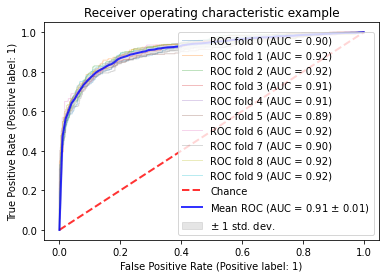

In [37]:
cv = StratifiedKFold(n_splits=10,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

#display = PrecisionRecallDisplay.from_estimator(
#    classifier, X_test, y_test, name="LinearSVC"
#)
#_ = display.ax_.set_title("2-class Precision-Recall curve")

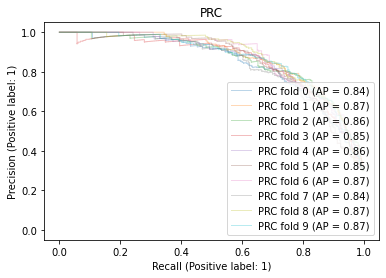

In [41]:
cv = StratifiedKFold(n_splits=10,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = PrecisionRecallDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="PRC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)



ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="PRC",
)
ax.legend(loc="lower right")
plt.show()

# Stack Models

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
content_train0, content_test, content_y0, content_ytest =  train_test_split(content_x, label, test_size = 0.2,random_state=6)
content_train1, content_train2,content_ytr1, content_ytr2 =  train_test_split(content_train0,content_y0, test_size = 0.5,random_state=6)

In [39]:
content_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(content_train1,content_ytr1)

In [40]:
content_input_x = content_classifier.predict_proba(content_train2)[:,1]

In [45]:
np.mean(content_ytr2)

0.3051948051948052

In [42]:
tag_train0, tag_test, tag_y0, tag_ytest =  train_test_split(tag_x, label, test_size = 0.2,random_state=6)
tag_train1, tag_train2,tag_ytr1, tag_ytr2 =  train_test_split(tag_train0,tag_y0, test_size = 0.5,random_state=6)

In [43]:
tag_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(tag_train1,tag_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [44]:
tag_input_x = tag_classifier.predict_proba(tag_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [46]:
np.mean(tag_ytr2)

0.3051948051948052

In [47]:
font_train0, font_test, font_y0, font_ytest =  train_test_split(font_x, label, test_size = 0.2,random_state=6)
font_train1, font_train2,font_ytr1, font_ytr2 =  train_test_split(font_train0,font_y0, test_size = 0.5,random_state=6)

In [48]:
font_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(font_train1,font_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [49]:
font_input_x = font_classifier.predict_proba(font_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [50]:
color_train0, color_test, color_y0, color_ytest =  train_test_split(color_x, label, test_size = 0.2,random_state=6)
color_train1, color_train2,color_ytr1, color_ytr2 =  train_test_split(color_train0,color_y0, test_size = 0.5,random_state=6)

In [51]:
color_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(color_train1,color_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [52]:
color_input_x = color_classifier.predict_proba(color_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
XX = []

In [55]:
for ind,w in enumerate(content_input_x):
    XX.append([w, tag_input_x[ind], font_input_x[ind], color_input_x[ind]])

In [56]:
XX[0]

[0.356, 0.10296169233908946, 0.20335227050807095, 0.1917436830981882]

In [57]:
from sklearn.metrics import average_precision_score

In [58]:
clf = LogisticRegression(random_state=0).fit(XX, color_ytr2)
print(clf.classes_)
y_scores = clf.predict_proba(XX)[:,1]

[0 1]


In [59]:
clf.coef_

array([[1.5937121 , 4.71487961, 2.18841262, 0.41899451]])

In [60]:
average_precision_score(color_ytr2, y_scores)

0.8402529285645591

In [61]:
from sklearn.metrics import roc_auc_score

roc_auc_score(color_ytr2, y_scores)

0.8938507351803983

In [62]:
content_input_test_x = content_classifier.predict_proba(content_test)[:,1]

In [63]:
tag_input_test_x = tag_classifier.predict_proba(tag_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [64]:
font_input_test_x = font_classifier.predict_proba(font_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [65]:
color_input_test_x = color_classifier.predict_proba(color_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [66]:
XXX = []

In [67]:
for ind,w in enumerate(content_input_test_x):
    XXX.append([w, tag_input_test_x[ind], font_input_test_x[ind], color_input_test_x[ind]])

In [68]:
y_scores = clf.predict_proba(XXX)[:,1]

In [69]:
average_precision_score(color_ytest, y_scores)

0.8354607077944549

In [70]:
roc_auc_score(font_ytest, y_scores)

0.9023914058716358

In [71]:
roc_auc_score(color_ytest, y_scores)

0.9023914058716358

In [38]:
web_features_use2 = []
tag_features_use2 = []
font_features_use2 = []
color_features_use2 = []
label2 = []

In [39]:
for ind,v in enumerate(zip(web_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind0:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0])
    if ind in tag_features_ind0:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if ind in font_features_ind0:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if ind in color_features_ind0:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(0)

In [40]:
len(label2)

13977

In [41]:
for ind,v in enumerate(zip(web_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind1:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0])
    if ind in tag_features_ind1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if ind in font_features_ind1:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if ind in color_features_ind1:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(1)

In [42]:
len(label2)

19365

In [43]:
tag_x2 = vectorizer.fit_transform(tag_features_use2).todense()

In [44]:
font_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use2]).todense()

In [45]:
color_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use2]).todense()

In [46]:
X2 = []

In [47]:
for ind,w in enumerate(web_features_use2):
    X2.append(w+tag_x2[ind].tolist()[0]+font_x2[ind].tolist()[0]+color_x2[ind].tolist()[0])

In [48]:
X3 = np.array(X2)
y3 = np.array(label2)

In [49]:
X3[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
np.mean(y3)

0.2782339271882262

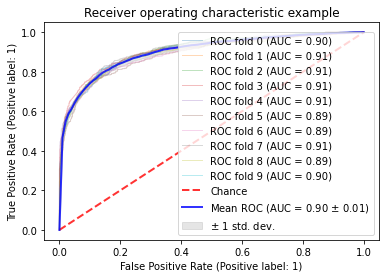

In [52]:
cv = StratifiedKFold(n_splits=10,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=30,n_estimators = 1000, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()